# Rainfall Weather Forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
1. Problem Statement: 
 * a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
 * b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

Dataset Description:
Number of columns: 23

* Date  - The date of observation
* Location  -The common name of the location of the weather station
* MinTemp  -The minimum temperature in degrees celsius
* MaxTemp -The maximum temperature in degrees celsius
* Rainfall  -The amount of rainfall recorded for the day in mm
* Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
* Sunshine  -The number of hours of bright sunshine in the day.
* WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
* WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
* WindDir9am -Direction of the wind at 9am
* WindDir3pm -Direction of the wind at 3pm
* WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
* WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
* Humidity9am -Humidity (percent) at 9am
* Humidity3pm -Humidity (percent) at 3pm
* Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
* Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
* Cloud9am - Fraction of sky obscured by cloud at 9am. 
* Cloud3pm -Fraction of sky obscured by cloud 
* Temp9am-Temperature (degrees C) at 9am
* Temp3pm -Temperature (degrees C) at 3pm
* RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
* RainTomorrow -The amount of next day rain in mm. Used to create response variable. A kind of measure of the "risk".


## Import Necessary Libaraies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Import the Dataset

In [2]:
# Import csv file to DataFrame
df = pd.read_csv('weatherAUS.csv')

In [3]:
print('No. of Rows : ',df.shape[0])
print('No. of Columns : ',df.shape[1])
pd.get_option('display.max_columns',None)

df.head()

No. of Rows :  8425
No. of Columns :  23


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
# Checking te columns in the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
# Checking name,count and dtypes of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

We see that there are float64(16), object(7) and some columms has missing values.

In [6]:
# Checking the duplicates values
df.duplicated().sum()

1663

We observe that there are duplicated value present in the dataset.

In [7]:
# Drop Duplicates 
df.drop_duplicates(inplace=True)

df.shape

(6762, 23)

We remove all the duplicates values.

In [8]:
# Checking the missing values
df.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

We see that there are missing values in the dataset first we check % percent of missing values.

In [9]:
# Checking how present value misisng
(df.isnull().sum()/df.shape[0])*100

Date              0.000000
Location          0.000000
MinTemp           1.035197
MaxTemp           0.842946
Rainfall          2.040816
Evaporation      43.197279
Sunshine         47.855664
WindGustDir      13.930790
WindGustSpeed    13.930790
WindDir9am       11.742088
WindDir3pm        4.347826
WindSpeed9am      0.931677
WindSpeed3pm      1.478852
Humidity9am       0.798580
Humidity3pm       1.419698
Pressure9am      19.343390
Pressure3pm      19.387755
Cloud9am         27.595386
Cloud3pm         28.127773
Temp9am           0.754215
Temp3pm           1.360544
RainToday         2.040816
RainTomorrow      2.040816
dtype: float64

We see some columns has missing lot of values we remove those columns. and columns not more misisng values so we remove only those rows which have missing values.

In [10]:
# Remove those columns has which has lot of missing values
df = df.drop(columns=['Evaporation','Sunshine'],axis=1)

df.shape

(6762, 21)

We remove 'Evaporation', 'Sunshine' columns because it has 43% missing values.

In [11]:
# Speate categorical and numerical columns

# Categorical columns
categorical = []

for i in df.columns:
    if df[i].dtypes == 'object':
        categorical.append(i)
        
print('Categorical Columns : ',categorical)

# Numerical Columns
numerical = []

for i in df.columns:
    if df[i].dtypes != 'object':
        numerical.append(i)
        
print('\nNumerical Columns : ',numerical)

Categorical Columns :  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

Numerical Columns :  ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [12]:
# Filling missing values in numerical columns

num = ['MinTemp','MaxTemp', 'WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
       'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']

from sklearn.impute import SimpleImputer

si  = SimpleImputer()
df[num] = si.fit_transform(df[num])

In [13]:
# Filling missing values in categorical columns

df['WindGustDir'].fillna(df['WindGustDir'].mode()[0],inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0],inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0],inplace=True)

In [14]:
# Checking missing values again
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall         138
WindGustDir        0
WindGustSpeed      0
WindDir9am         0
WindDir3pm         0
WindSpeed9am       0
WindSpeed3pm       0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Cloud9am           0
Cloud3pm           0
Temp9am            0
Temp3pm            0
RainToday        138
RainTomorrow     138
dtype: int64

In [15]:
# Drop misisng values in target columns
df = df.dropna(axis=0)

In [16]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [17]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4  2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  Humidity3pm  \
0          W        WNW          20.0  ...         71.0         22.0   
1        NNW        WSW           4.0  ...         44.0         25.0   
2          W        WSW          19.0  ...         38.0         30.0   
3         SE          E          11.0  ...         45.0         16.0   
4        ENE         NW           7.0  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1  8.000000  4.320988     16.9     21.8         No   
1       1010.6       1007.8  4.336806  4.320988     17.2     24.3         No   
2       1007.6       1008.7  4.336806  2.000000     21.0     23.2         No   
3       1017.6       1012.8  4.336806  4.320988     18.1     26.5         No   
4       1010.8       1006.0  7.000000  8.000000     17.8     29.7         No   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No  

[5 rows x 21 columns]

In [18]:
# Converting the datatype of Date Column from object to datetime
df["Date"] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6558 entries, 0 to 8423
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           6558 non-null   datetime64[ns]
 1   Location       6558 non-null   object        
 2   MinTemp        6558 non-null   float64       
 3   MaxTemp        6558 non-null   float64       
 4   Rainfall       6558 non-null   float64       
 5   WindGustDir    6558 non-null   object        
 6   WindGustSpeed  6558 non-null   float64       
 7   WindDir9am     6558 non-null   object        
 8   WindDir3pm     6558 non-null   object        
 9   WindSpeed9am   6558 non-null   float64       
 10  WindSpeed3pm   6558 non-null   float64       
 11  Humidity9am    6558 non-null   float64       
 12  Humidity3pm    6558 non-null   float64       
 13  Pressure9am    6558 non-null   float64       
 14  Pressure3pm    6558 non-null   float64       
 15  Cloud9am       6558 non-nu

In [19]:
# Setting Date as Dataframe Index
df.set_index('Date',inplace=True)

df.head()

Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
Date                                                                         
2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

           WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Date                                                                        
2008-12-01          W        WNW          20.0          24.0         71.0   
2008-12-02        NNW        WSW           4.0          22.0         44.0   
2008-12-03          W        WSW          19.0          26.0         38.0   
2008-12-04         SE          E          11.0           9.0         45.0   
2008-12-05        ENE         NW           7.0          20.0         82.0   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Date                                                                    
2008-12-01         22.0       1007.7       1007.1  8.000000  4.320988   
2008-12-02         25.0       1010.6       1007.8  4.336806  4.320988   
2008-12-03         30.0       1007.6       1008.7  4.336806  2.000000   
2008-12-04         16.0       1017.6       1012.8  4.336806  4.320988   
2008-12-05         33.0       1010.8       1006.0  7.000000  8.000000   

            Temp9am  Temp3pm RainToday RainTomorrow  
Date                                                 
2008-12-01     16.9     21.8        No           No  
2008-12-02     17.2     24.3        No           No  
2008-12-03     21.0     23.2        No           No  
2008-12-04     18.1     26.5        No           No  
2008-12-05     17.8     29.7        No           No

In [20]:
# Checking the unique values in the dataset
df.nunique().to_frame('No. of unique values')

No. of unique values
Location                         12
MinTemp                         286
MaxTemp                         332
Rainfall                        250
WindGustDir                      16
WindGustSpeed                    52
WindDir9am                       16
WindDir3pm                       16
WindSpeed9am                     34
WindSpeed3pm                     36
Humidity9am                      91
Humidity3pm                      95
Pressure9am                     383
Pressure3pm                     374
Cloud9am                         10
Cloud3pm                         10
Temp9am                         305
Temp3pm                         328
RainToday                         2
RainTomorrow                      2

In [21]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print('*'*50)

Location
PerthAirport    1204
Albury           889
Newcastle        804
Melbourne        721
CoffsHarbour     609
Brisbane         569
Williamtown      568
Penrith          476
Darwin           250
Wollongong       232
Adelaide         198
Uluru             38
Name: count, dtype: int64
**************************************************
MinTemp
 12.0    56
 13.2    55
 10.8    52
 12.7    52
 17.8    50
         ..
-1.2      1
 0.3      1
 28.0     1
-1.1      1
 26.0     1
Name: count, Length: 286, dtype: int64
**************************************************
MaxTemp
19.0    66
19.8    61
20.8    54
22.3    54
20.0    53
        ..
42.9     1
39.9     1
38.9     1
44.9     1
43.5     1
Name: count, Length: 332, dtype: int64
**************************************************
Rainfall
0.0      4292
0.2       320
0.4       144
0.6        85
1.2        68
         ... 
141.8       1
49.6        1
30.0        1
37.6        1
40.0        1
Name: count, Length: 250, dtype: int64
***********

## Description of Dataset

In [22]:
# Statistial summary of numerical columns
df.describe()

MinTemp      MaxTemp     Rainfall  WindGustSpeed  WindSpeed9am  \
count  6558.000000  6558.000000  6558.000000    6558.000000   6558.000000   
mean     13.069614    24.094670     2.771134      38.840173     12.699919   
std       5.567777     6.128218    10.599379      13.351051      9.782494   
min      -2.000000     8.200000     0.000000       7.000000      0.000000   
25%       9.000000    19.600000     0.000000      30.000000      6.000000   
50%      13.109145    23.500000     0.000000      38.977663     11.000000   
75%      17.400000    28.400000     0.800000      46.000000     19.000000   
max      28.500000    45.500000   371.000000     107.000000     61.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   6558.000000  6558.000000  6558.000000  6558.000000  6558.000000   
mean      17.484704    67.459245    50.431377  1017.674243  1015.156023   
std        9.553078    17.224999    18.535110     6.019976     5.953277   
min        0.000000    10.000000     6.000000   989.800000   982.900000   
25%        9.000000    56.000000    38.000000  1014.300000  1011.600000   
50%       17.000000    68.000000    50.000000  1017.626311  1015.119923   
75%       24.000000    80.000000    62.000000  1020.975000  1018.400000   
max       83.000000   100.000000    99.000000  1039.000000  1036.000000   

          Cloud9am     Cloud3pm      Temp9am      Temp3pm  
count  6558.000000  6558.000000  6558.000000  6558.000000  
mean      4.312855     4.306550    17.890064    22.709412  
std       2.493101     2.338847     5.729630     5.968296  
min       0.000000     0.000000     1.900000     7.300000  
25%       2.000000     2.000000    13.825000    18.400000  
50%       4.336806     4.320988    17.900000    22.200000  
75%       7.000000     6.000000    22.200000    26.800000  
max       8.000000     8.000000    39.400000    44.100000

From the above description we can observe the following:-

 1. The counts of all the columns are same which means there no missing values in the dataset.
 2. The mean values is greater than the median (50%) no more difference.
 3. The data is columns have mean value not more difference.
 4. By summarizing he we can observe there is huge differences between 75% and max hence there outliers present in the data.
 4. We can also notice the Standard deviation, min, 25% percentile values from this describe method.

### 1. We haeve two Problem Statement So we build two model: 
 1) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
 2)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

## Data Visualization

### Univariate Analysis

### Classification model whether or not it will rain tomorrow.

RainTomorrow
No     5023
Yes    1535
Name: count, dtype: int64


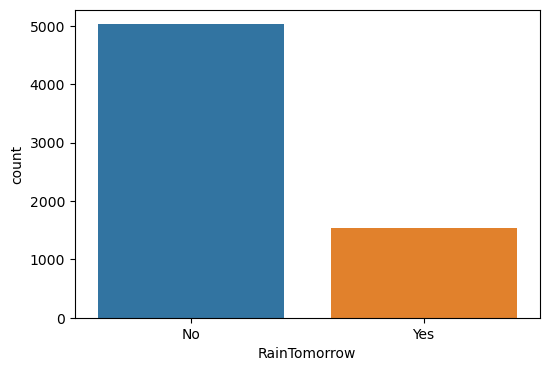

In [23]:
# Let visualize Classification model whether or not it will rain tomorrow
print(df['RainTomorrow'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='RainTomorrow',data=df)
plt.show()

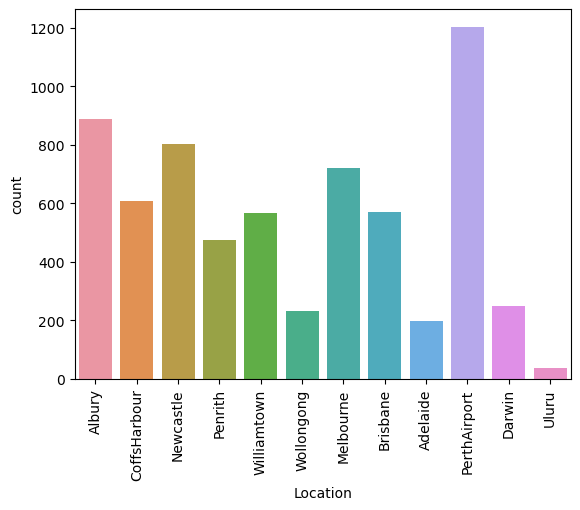

In [24]:
# Let visualize count of Location
sns.countplot(x='Location',data=df)
plt.xticks(rotation=90)
plt.show()

The count of PerthAirport is high.

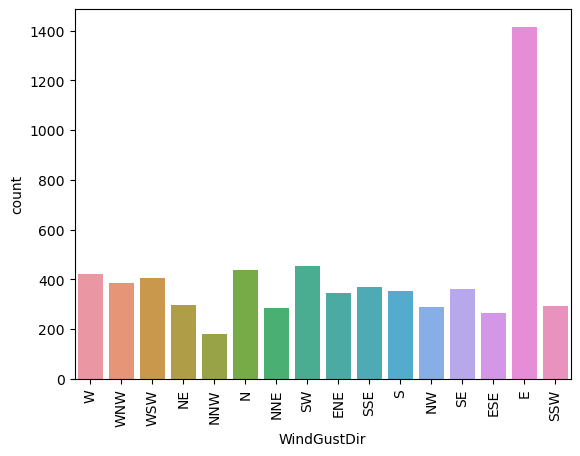

In [25]:
# Let visualize count of WindGustDir
sns.countplot(x='WindGustDir',data=df)
plt.xticks(rotation=90)
plt.show()

The count of E (East) is very high. and other all almost same. It mean direction of windGust is N (East). 

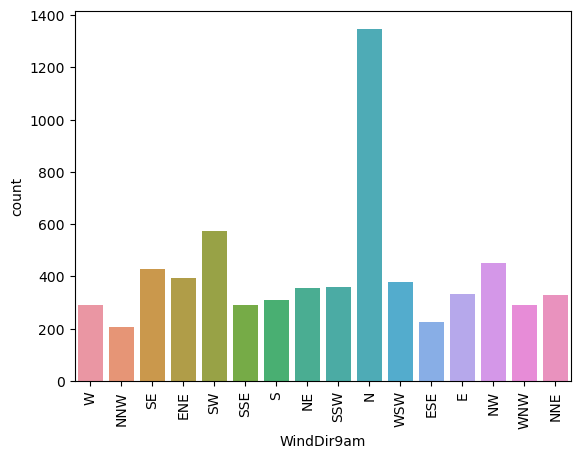

In [26]:
# Let visualize count of WindDir9am
sns.countplot(x='WindDir9am',data=df)
plt.xticks(rotation=90)
plt.show()

The count of N (North) is very high. and other all almost same. It mean in morning the direction of wind is N (north). 

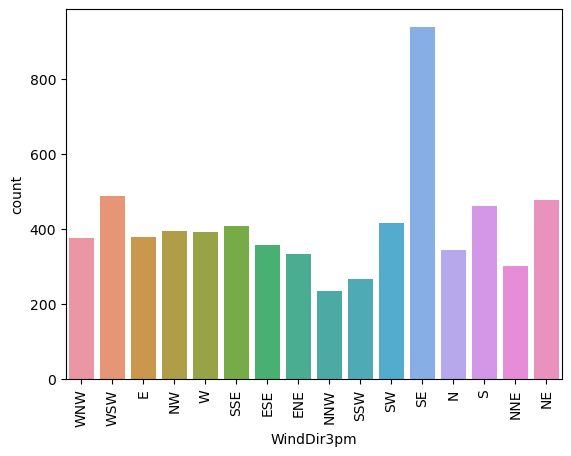

In [27]:
# Let visualize count of WindDir9am
sns.countplot(x='WindDir3pm',data=df)
plt.xticks(rotation=90)
plt.show()

The count of SE (SouthEast) is very high. and other all almost same. It mean in morning the direction of wind is SE (SouthEast).

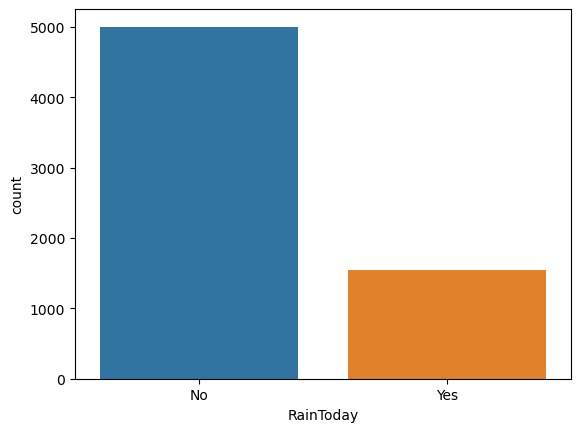

In [28]:
# Let visualize count of RainToday
sns.countplot(x='RainToday',data=df)
plt.show()

The count of No is very high than No.

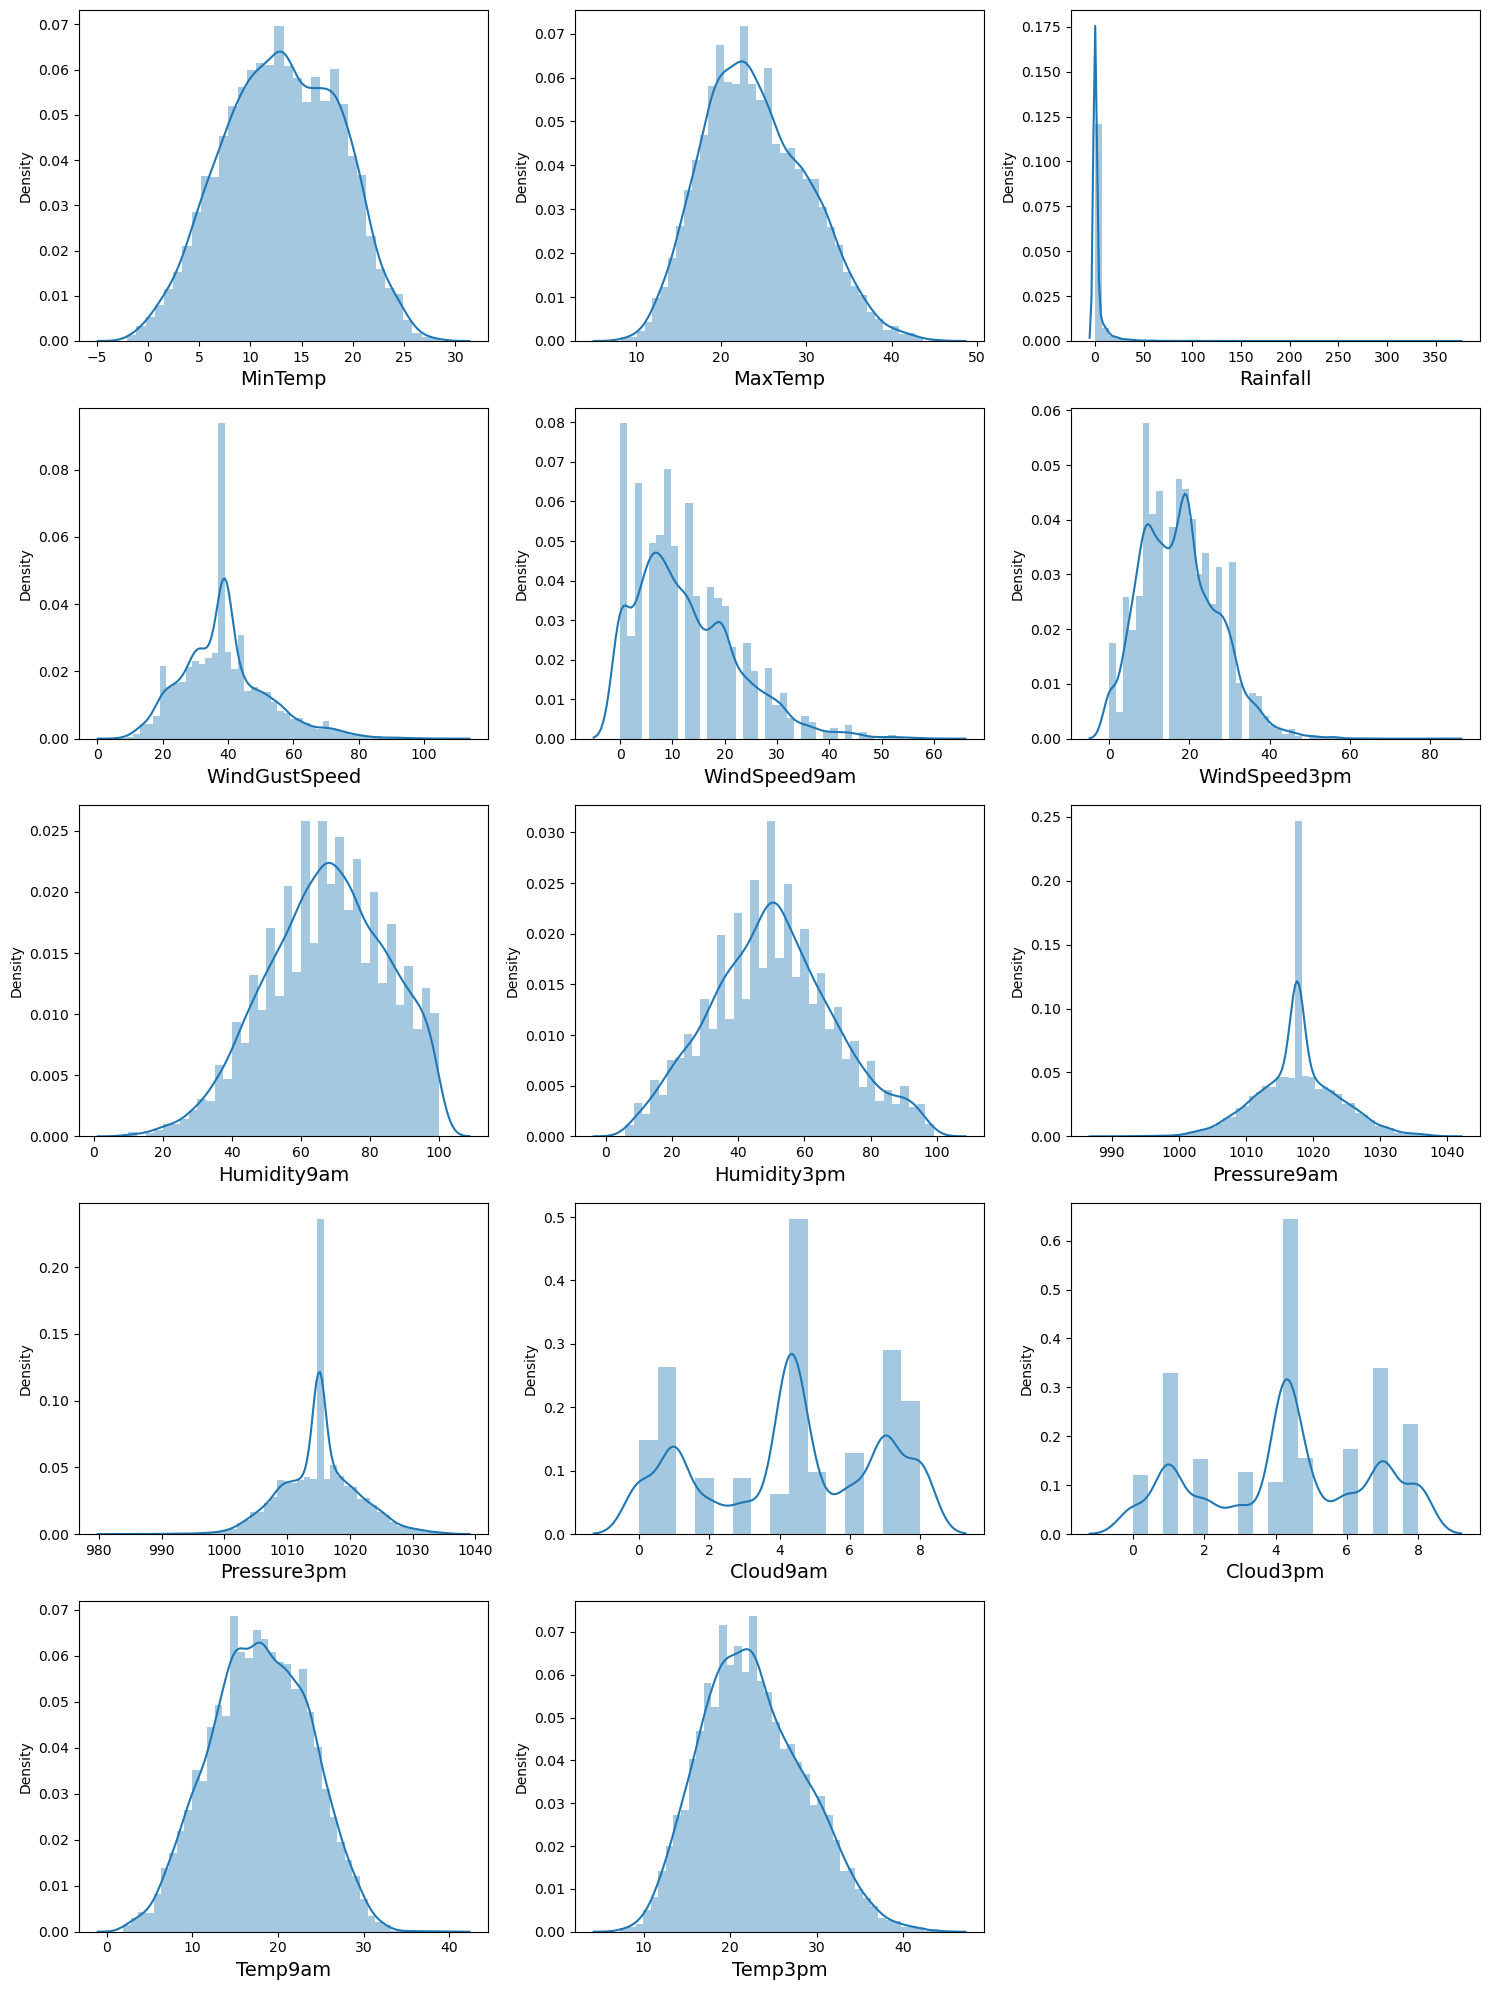

In [29]:
# Let's see how the data distributed of each columns
plt.figure(figsize=(15,20),facecolor ='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=14)
    plotnumber += 1
plt.tight_layout()

From the above distribution plots we can notice the WindGustSpeed','WindSpeed9am','WindSpeed3pm' 'Pressure9am','Pressure3pm'columns has not distributed. 

### Bivariate Analysis

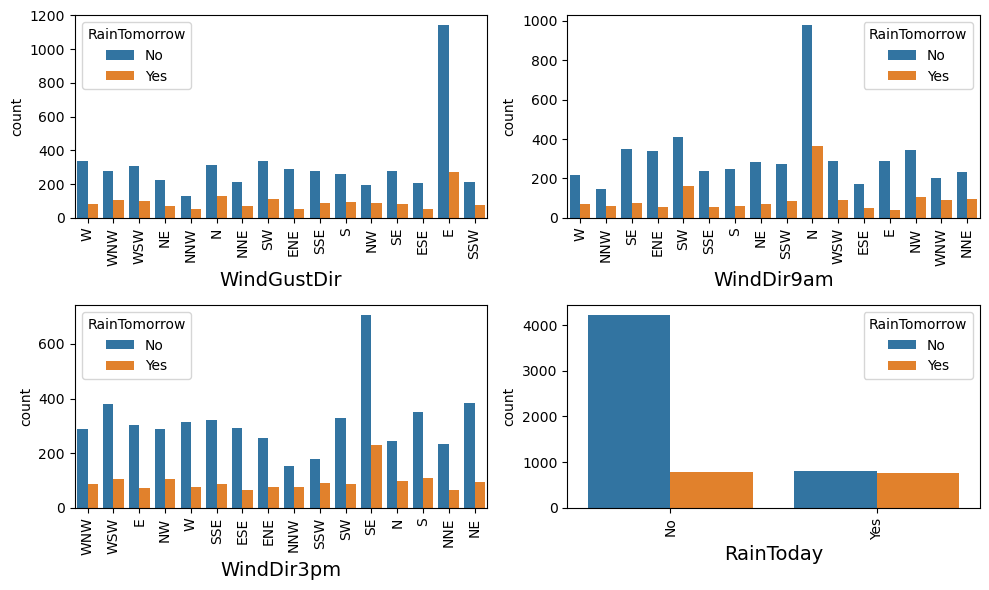

In [30]:
# Comparing categorical columns with classfication model
plt.figure(figsize=(10,6),facecolor ='white')
plotnumber = 1

for col in df[['WindGustDir','WindDir9am','WindDir3pm','RainToday']]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(x= col,hue='RainTomorrow',data=df)
        plt.xlabel(col,fontsize=14)
        plt.xticks(rotation=90)
    plotnumber += 1
plt.tight_layout()

We can oberve that there are not significant different.

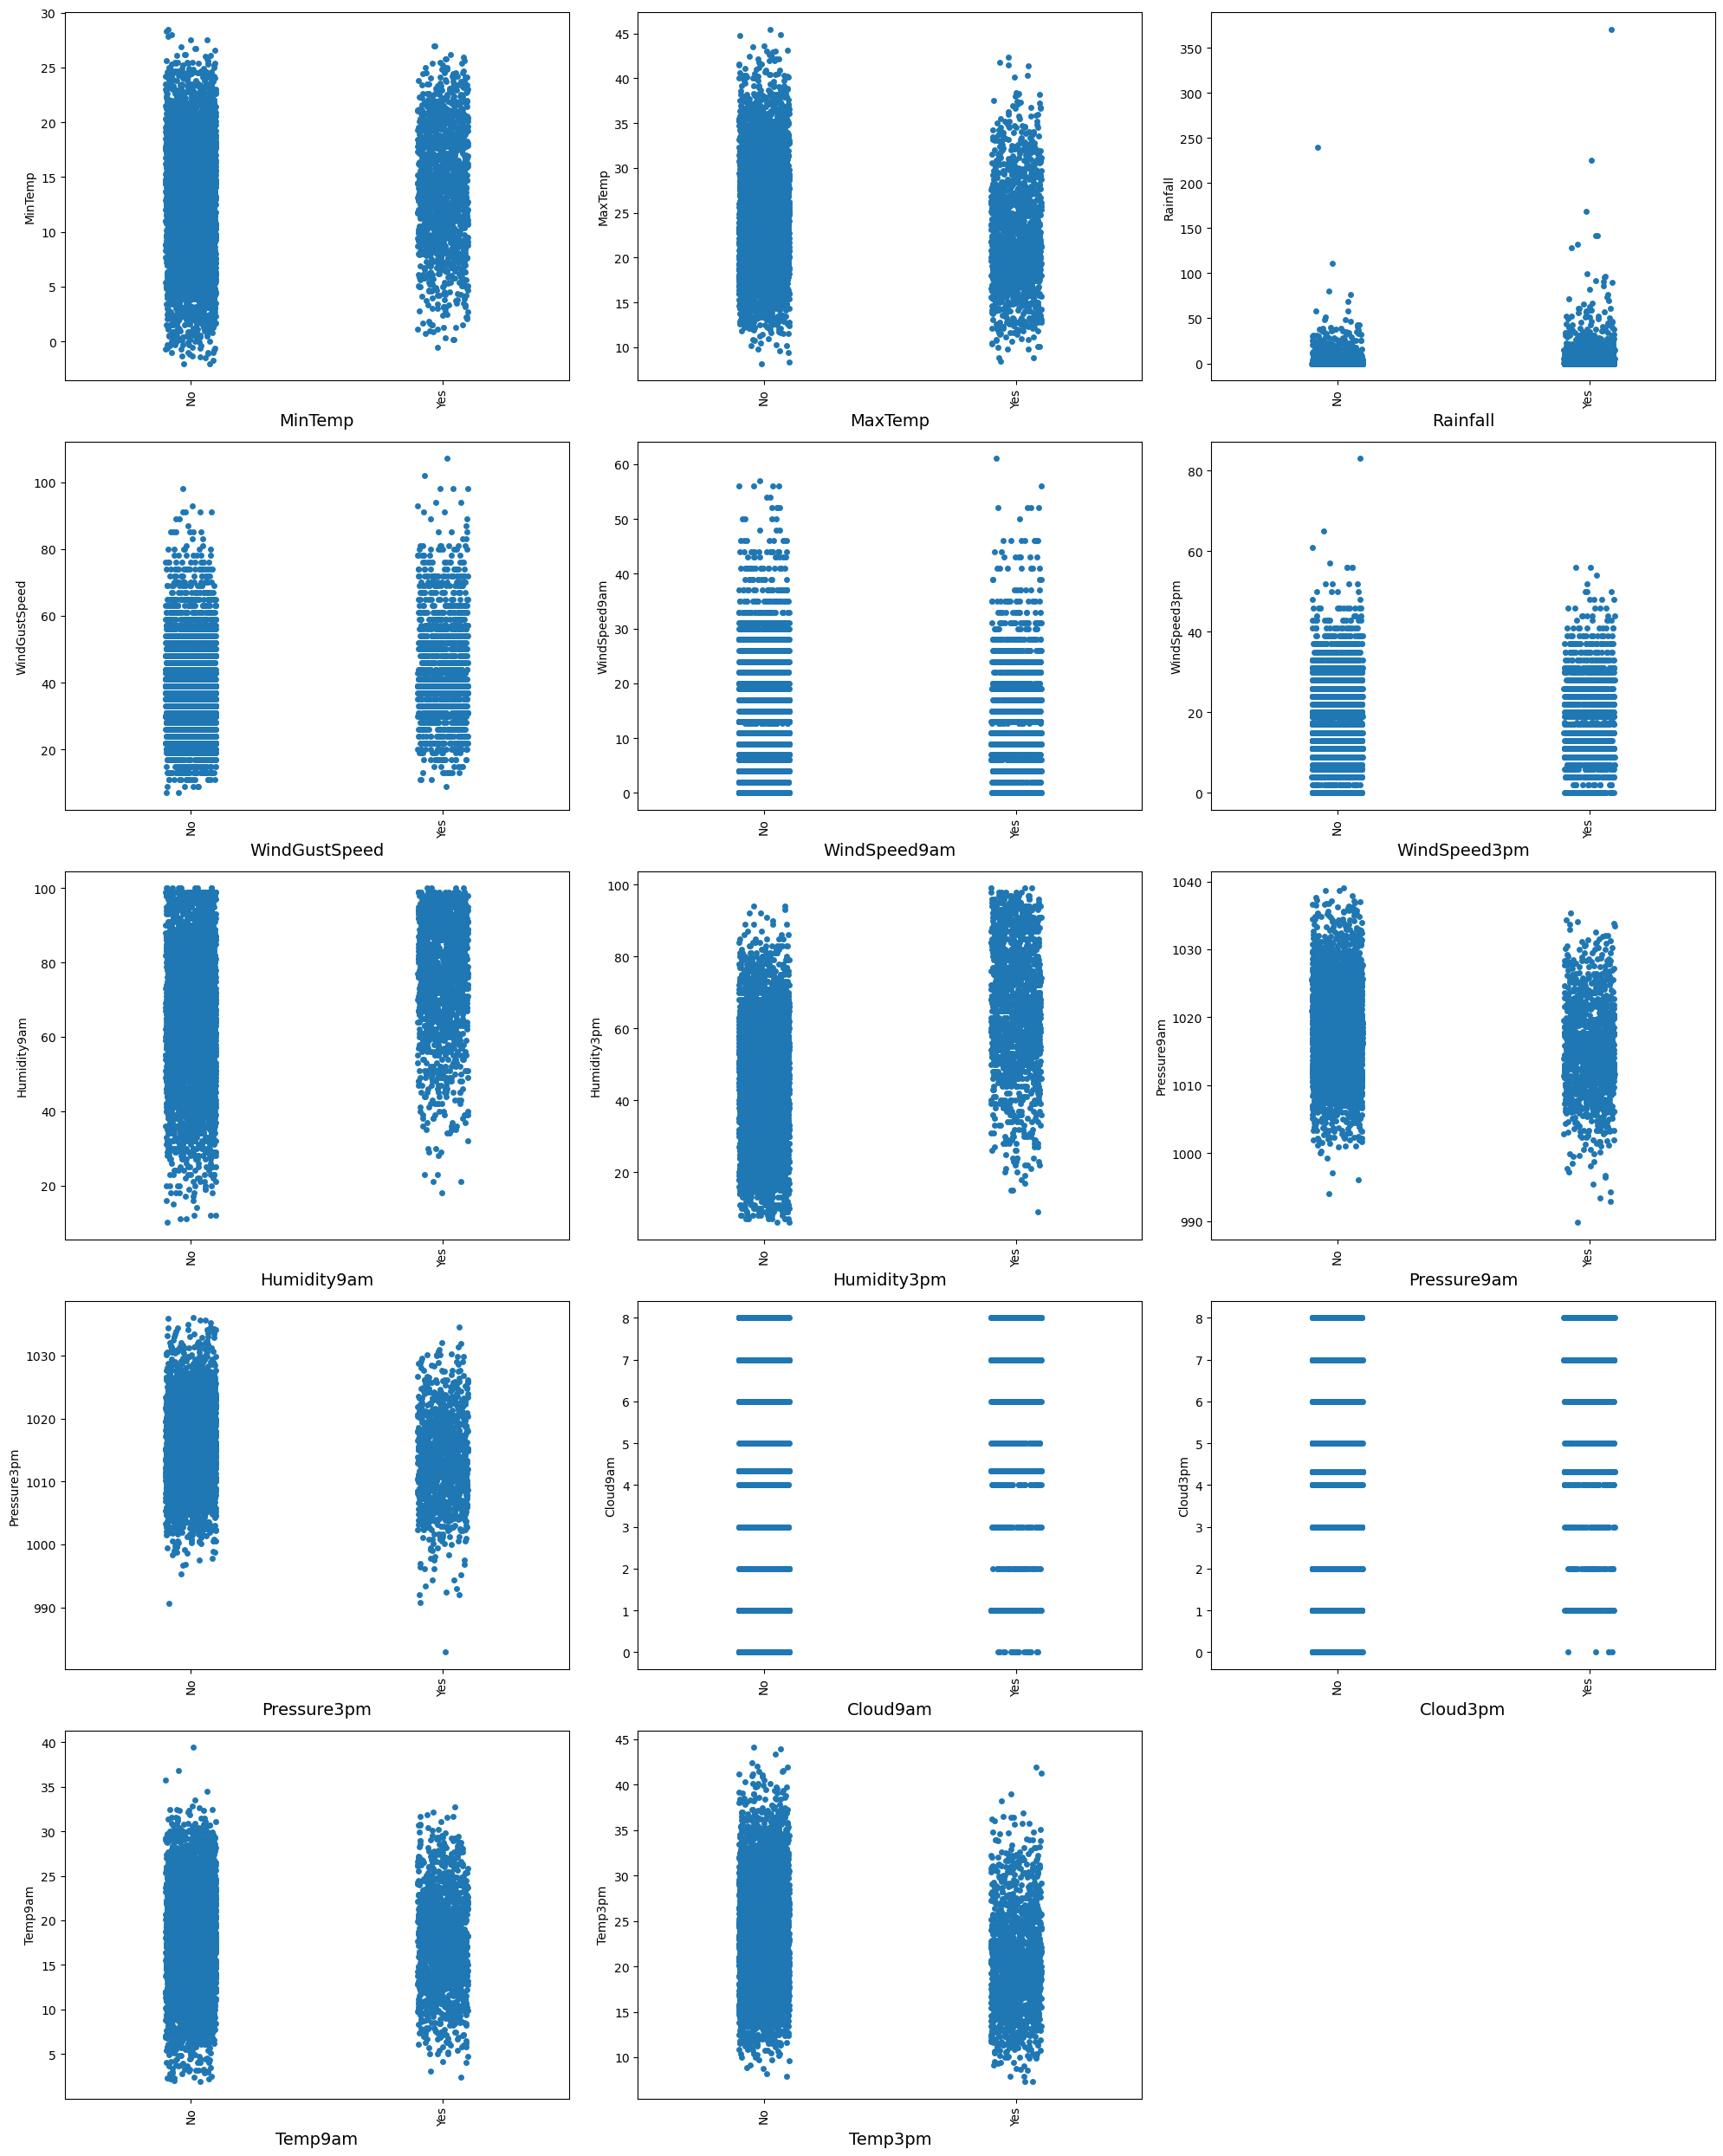

In [31]:
# Check the relationship between all features and classification target
plt.figure(figsize=(20,25),facecolor ='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.stripplot(x='RainTomorrow',y=col,data=df)
        plt.xlabel(col,fontsize=14)
        plt.xticks(rotation=90)
    plotnumber += 1
plt.tight_layout()

There is significant difference between the numerical features and classificaiton target.

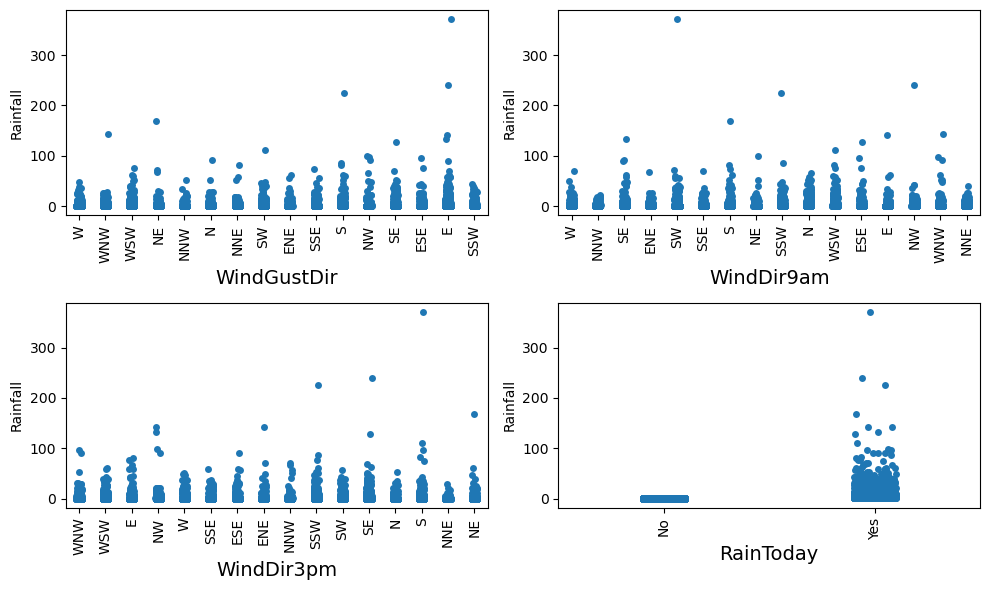

In [32]:
# Comparing categorical columns with regression model
plt.figure(figsize=(10,6),facecolor ='white')
plotnumber = 1

for col in df[['WindGustDir','WindDir9am','WindDir3pm','RainToday']]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.stripplot(x=col, y='Rainfall',data=df)
        plt.xlabel(col,fontsize=14)
        plt.xticks(rotation=90)
    plotnumber += 1
plt.tight_layout()

We observe that in Railfall columns raintoday has linear relatinoship but other columns has not much relationship.

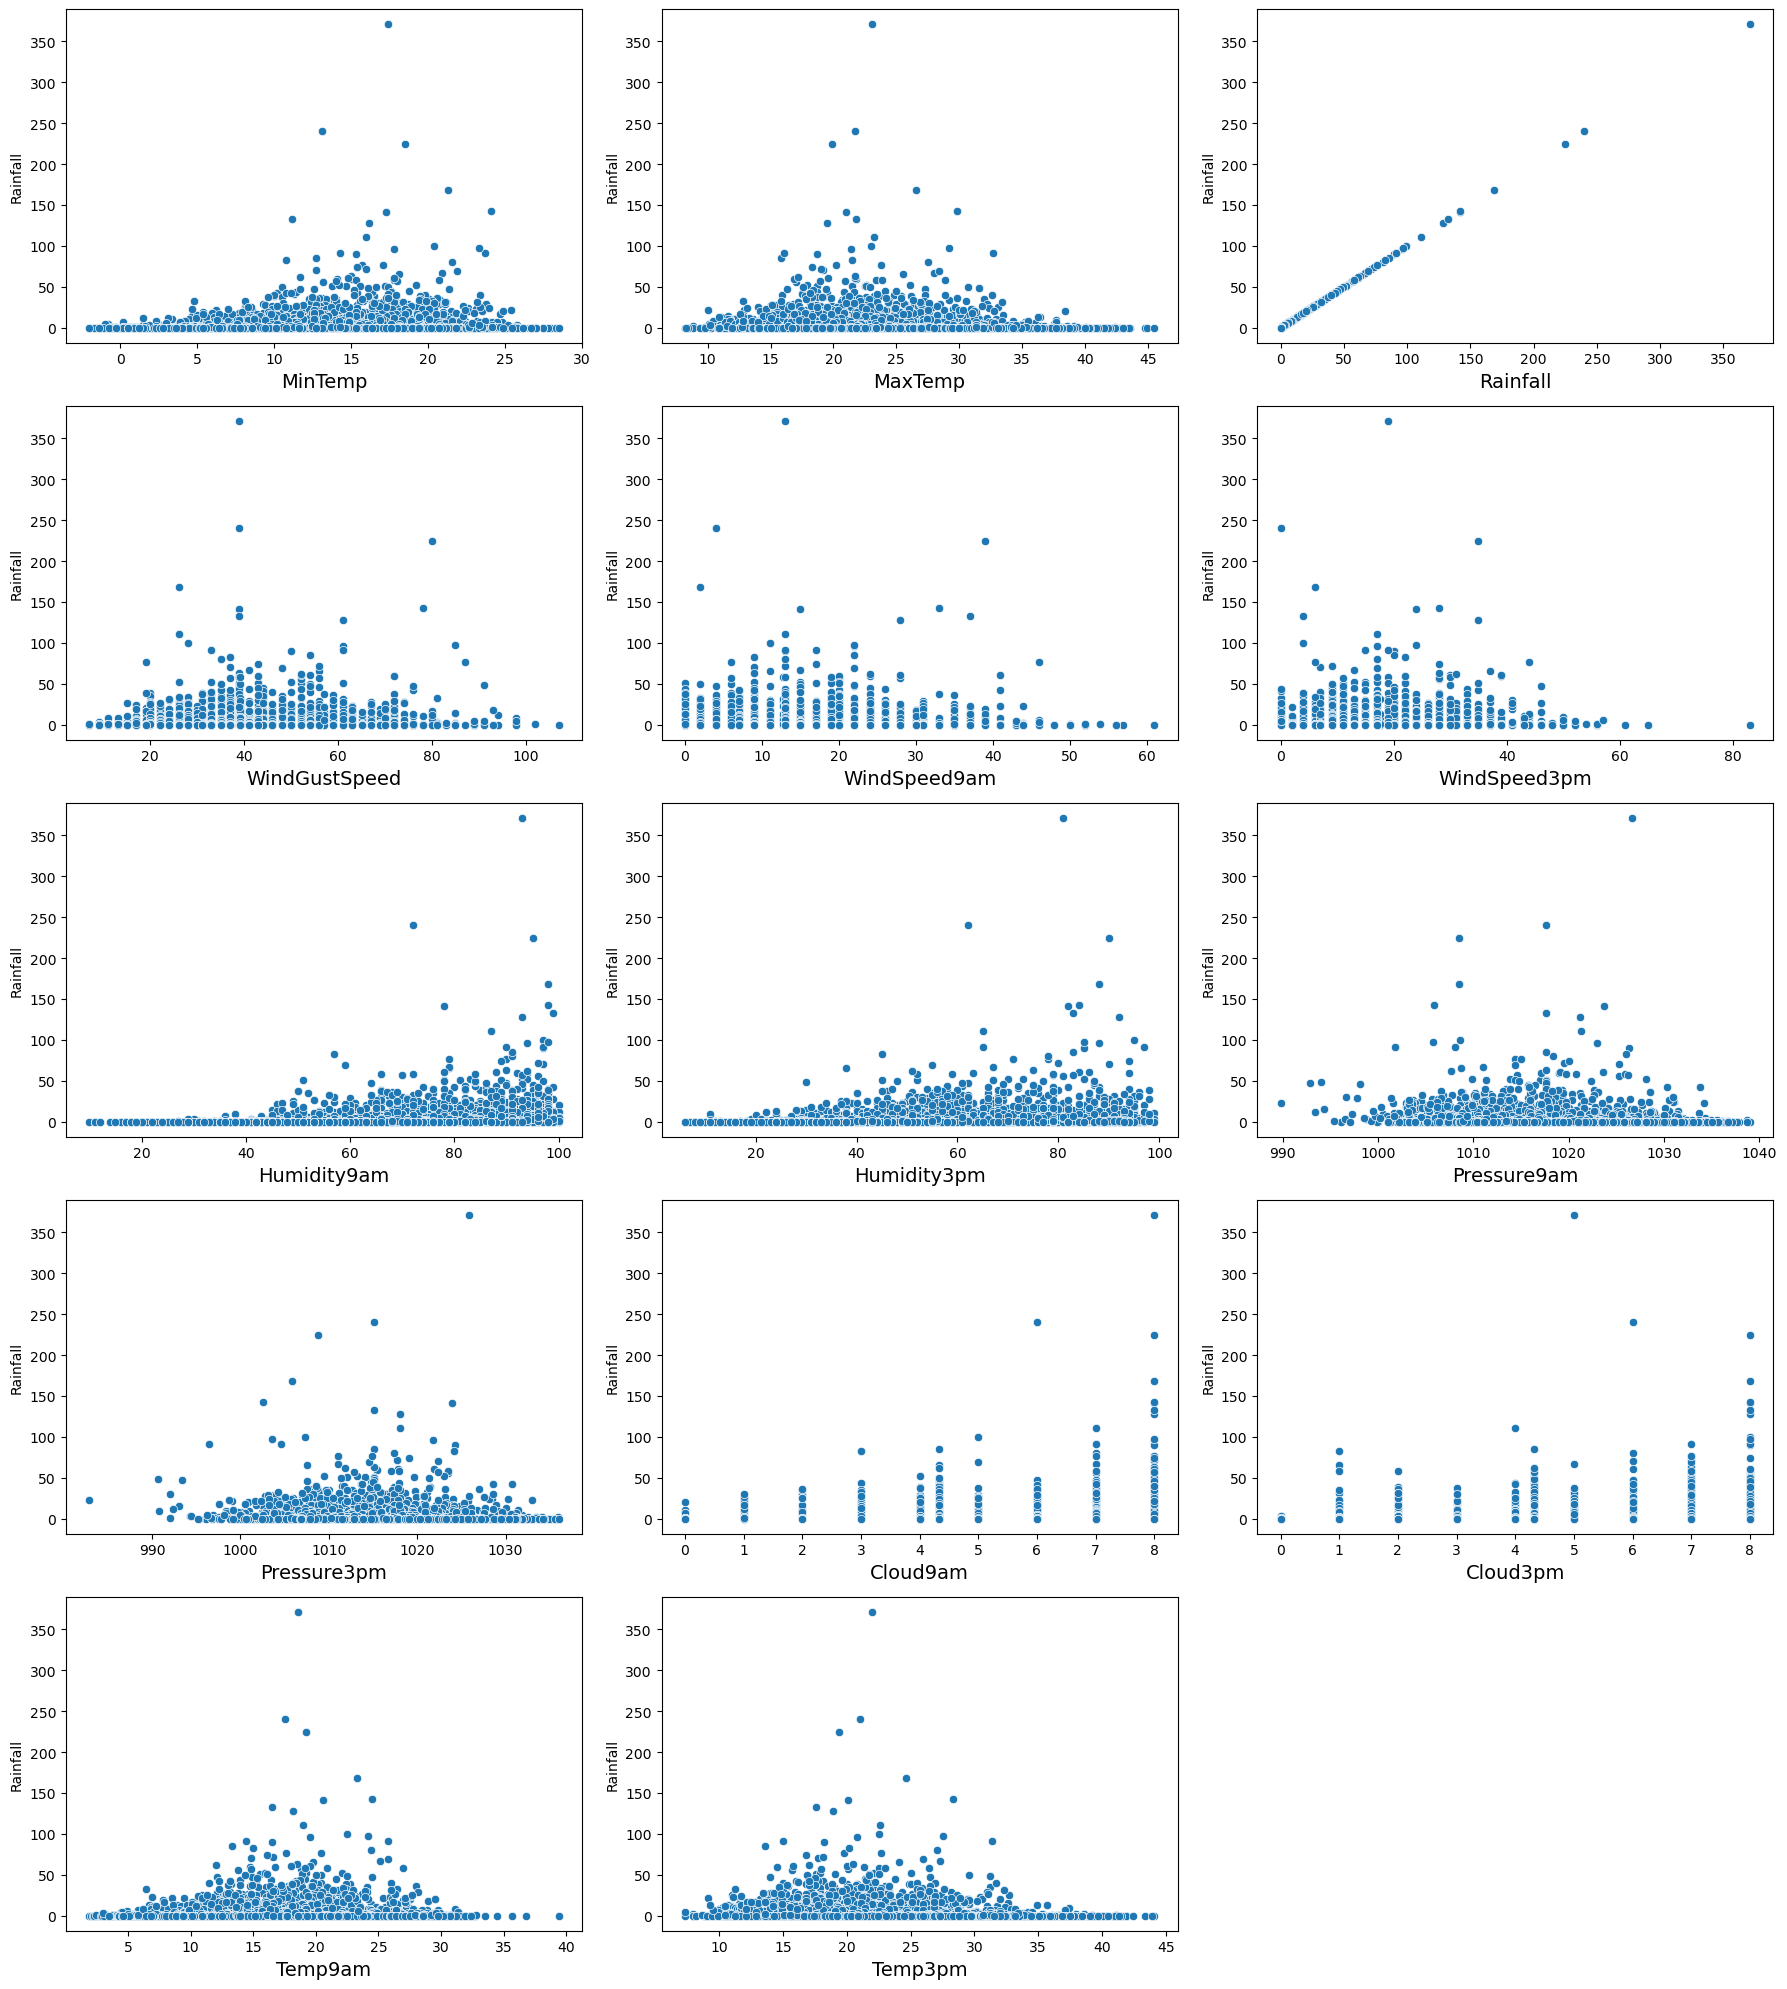

In [33]:
# Checking the relation ship between feature and regression target variable.
plt.figure(figsize=(18,20),facecolor ='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.scatterplot(x=col ,y='Rainfall',data=df)
        plt.xlabel(col,fontsize=14)
    plotnumber += 1
plt.tight_layout()

We osberve that all the columns has relationshp with regression target column.

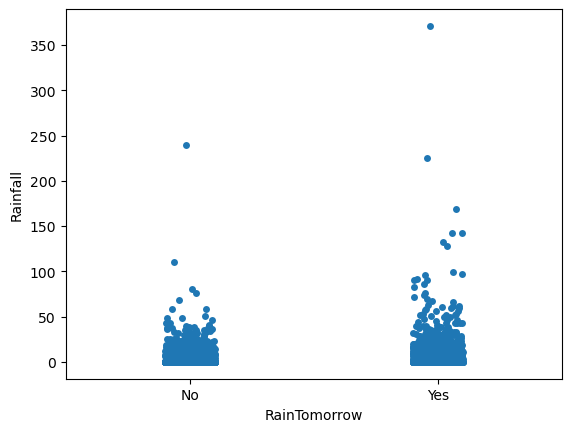

In [34]:
# Checking the relationship of Continous and categorial target variables
sns.stripplot(x='RainTomorrow',y='Rainfall',data=df)
plt.show()

We an osberve taht lienar reltaionship.

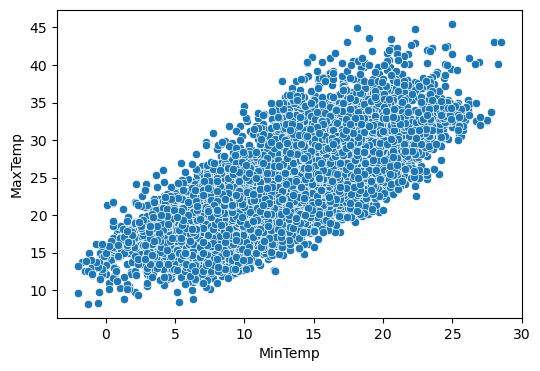

In [35]:
# Checking the relationship between MinTemp vs MaxTemp
plt.figure(figsize=(6,4))
sns.scatterplot(x='MinTemp',y='MaxTemp',data=df)
plt.show()

We see that strong linear relationship between MinTemp vs MaxTemp.

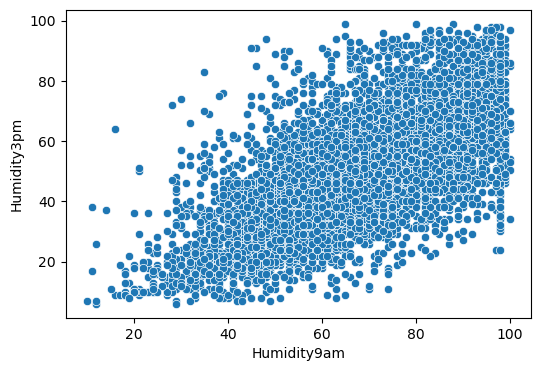

In [36]:
# Checking the relationship between Humidity9am vs Humidity3pm
plt.figure(figsize=(6,4))
sns.scatterplot(x='Humidity9am',y='Humidity3pm',data=df)
plt.show()

We see that strong linear relationship between  Humidity9am vs Humidity3pm.

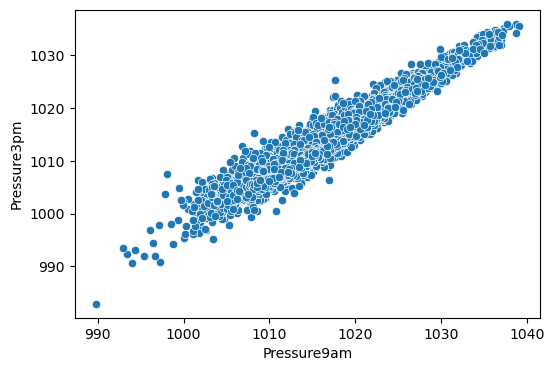

In [37]:
# Checking the relationship between Pressure9am vs Pressure3pm
plt.figure(figsize=(6,4))
sns.scatterplot(x='Pressure9am',y='Pressure3pm',data=df)
plt.show()

We see that strong linear relationship between Pressure9am vs Pressure3pm.

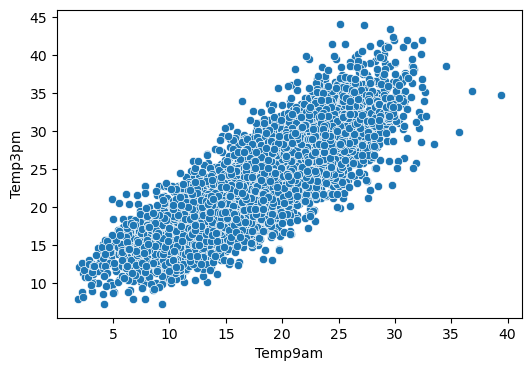

In [38]:
# Checking the relationship between Temp9am vs Temp3pm
plt.figure(figsize=(6,4))
sns.scatterplot(x='Temp9am',y='Temp3pm',data=df)
plt.show()

We see that strong linear relationship between  Temp9am vs Temp3pm.

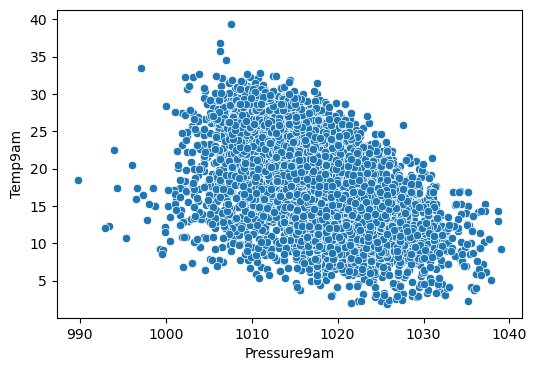

In [39]:
# Checking the relationship between Pressure9am vs Humidity9am
plt.figure(figsize=(6,4))
sns.scatterplot(x='Pressure9am',y='Temp9am',data=df)
plt.show()

We see that strong linear relationship between Pressure9am vs Humidity9am.

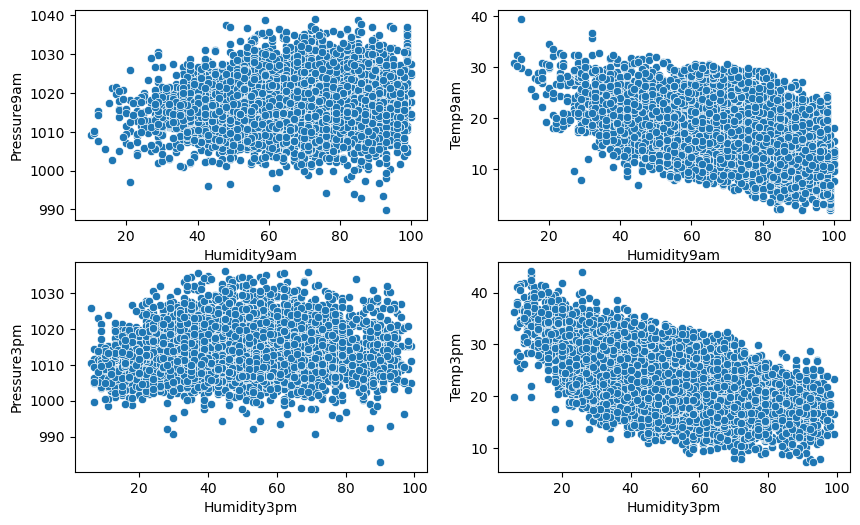

In [40]:
# Checking the relationship between features 
fig,axs=plt.subplots(2,2,figsize=(10,6))

sns.scatterplot(x='Humidity9am',y='Pressure9am',data=df,ax=axs[0,0])
sns.scatterplot(x='Humidity9am',y='Temp9am',data=df,ax=axs[0,1])
sns.scatterplot(x='Humidity3pm',y='Pressure3pm',data=df,ax=axs[1,0])
sns.scatterplot(x='Humidity3pm',y='Temp3pm',data=df,ax=axs[1,1])
plt.show()

* We see that no much linear relationship between Humidity vs Pressure.

* We see that negative strong linear relationship between Humidity vs Temp.

## Multivariate Analysis

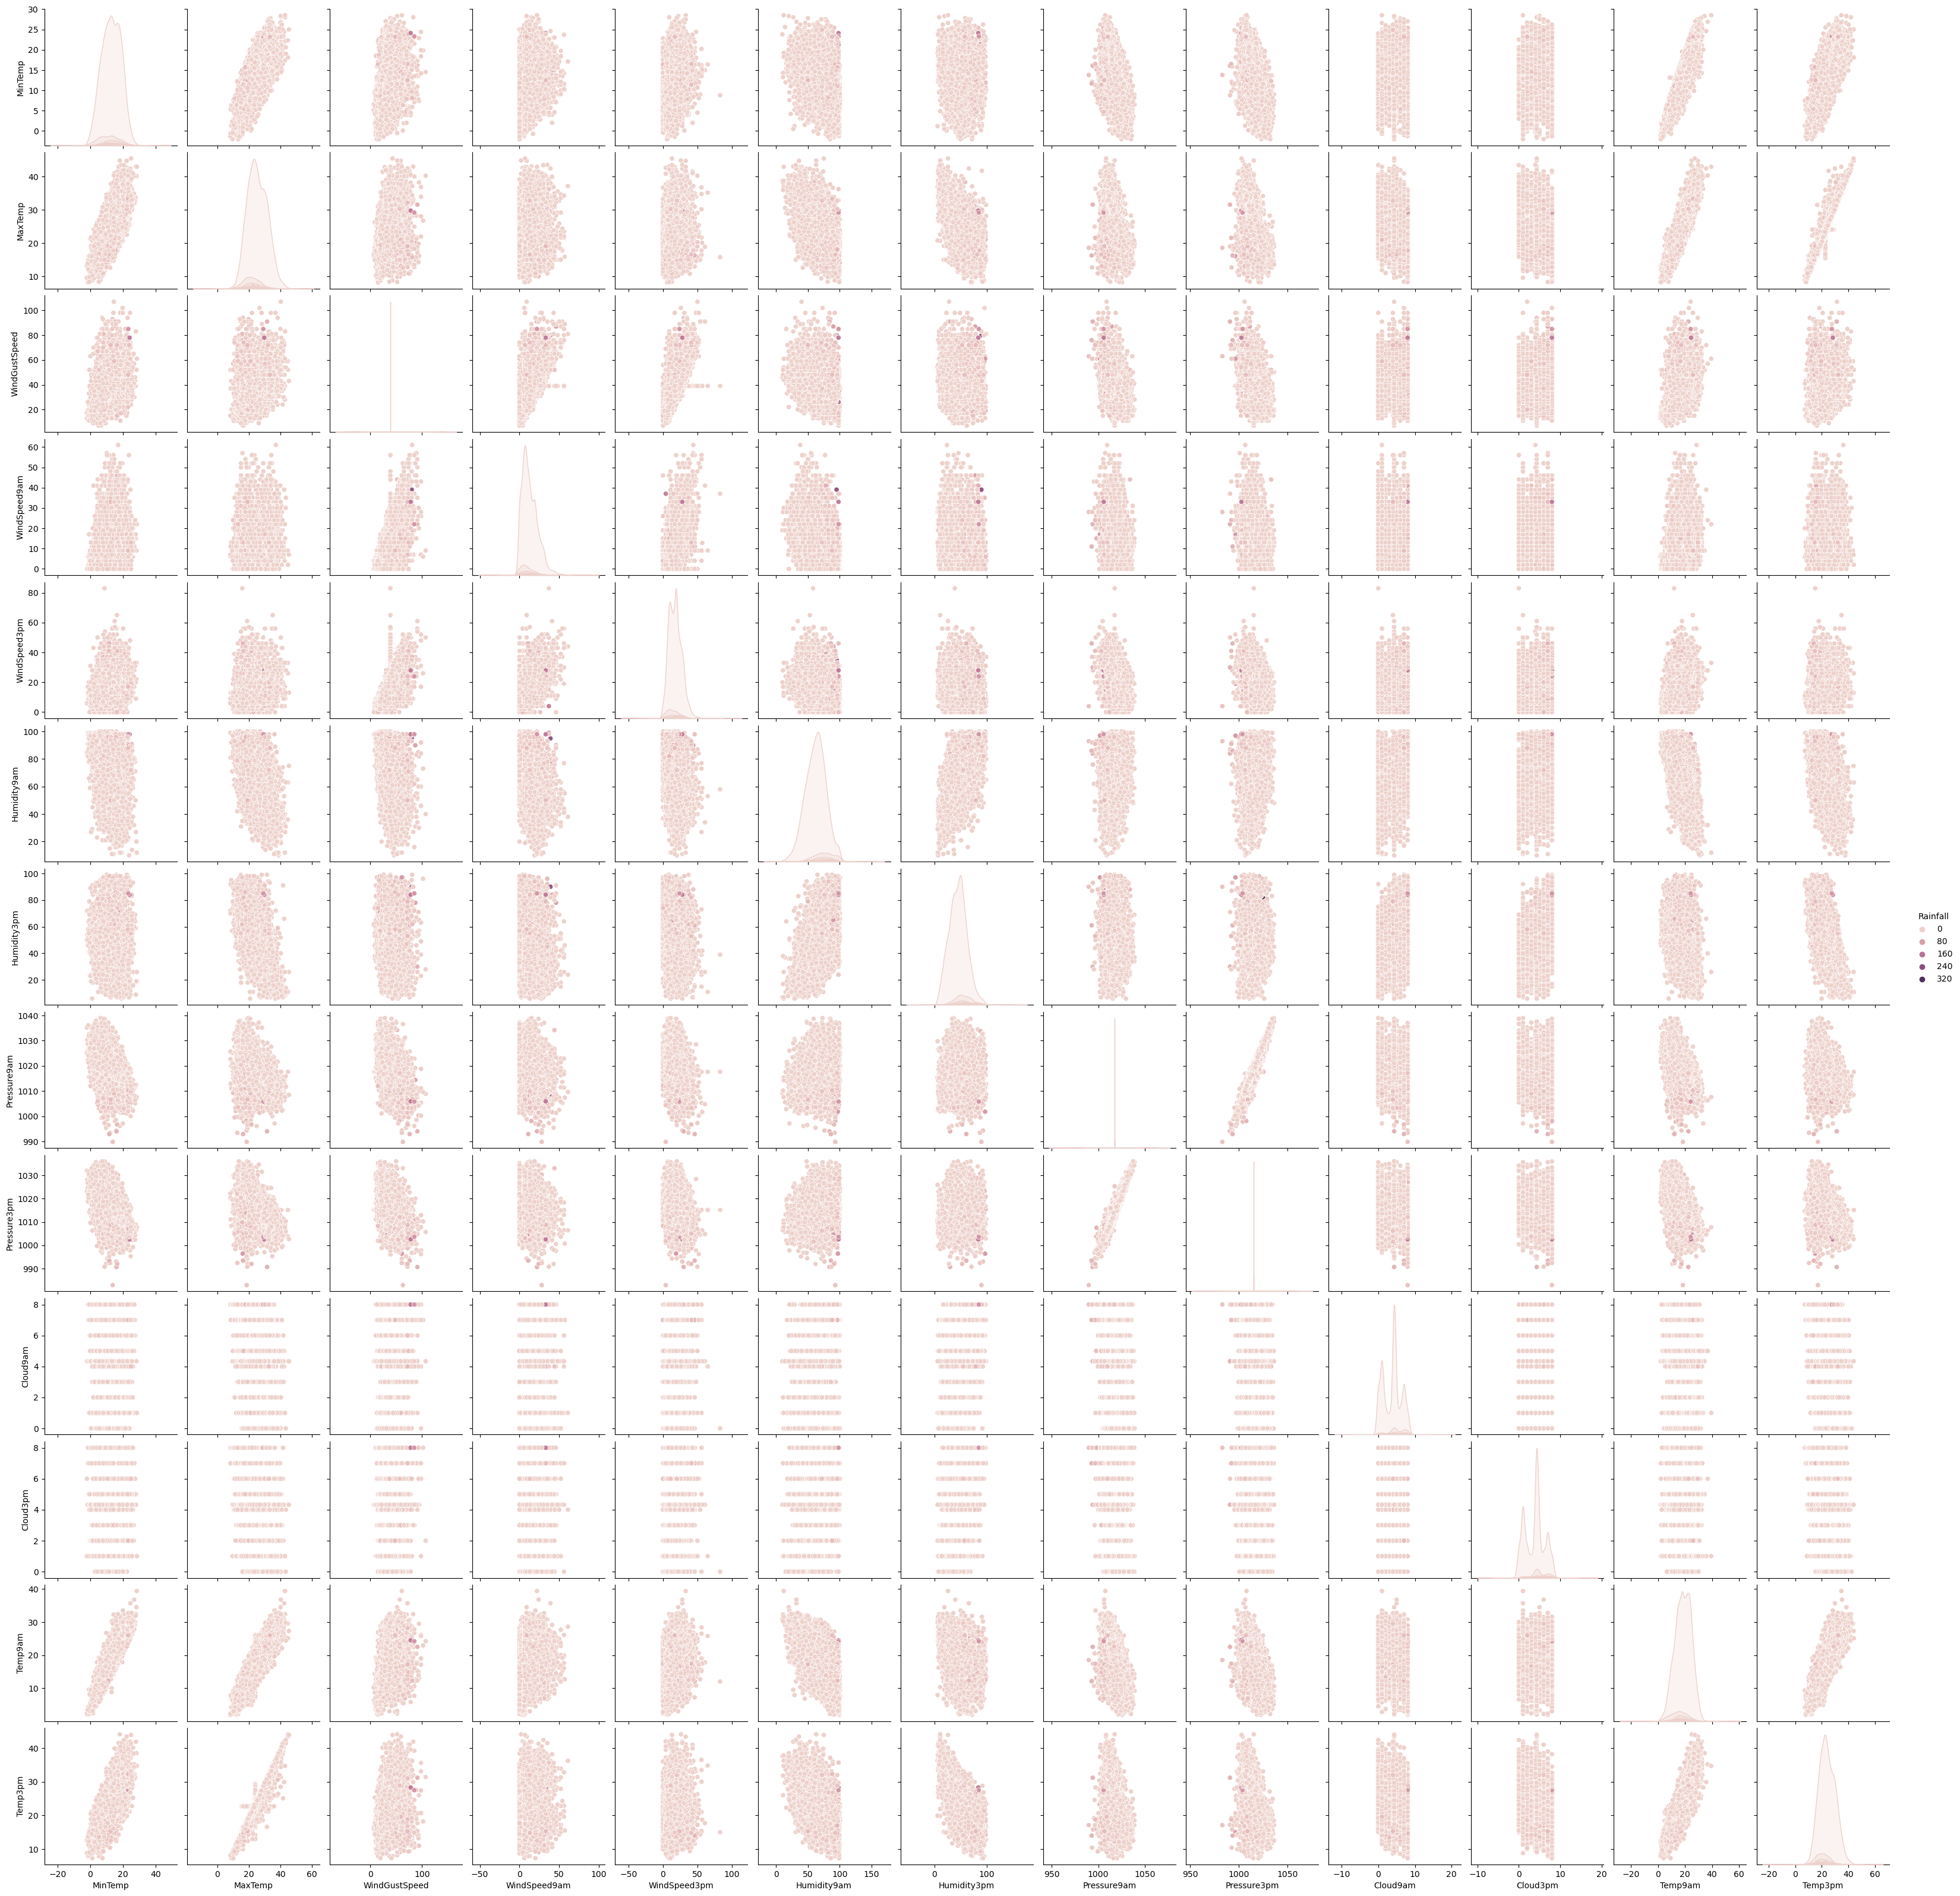

In [41]:
sns.pairplot(df,hue='Rainfall')
plt.show()

The pairplot gives the pairwise relation between the features on the basis on the target column.

## Identify Outliers

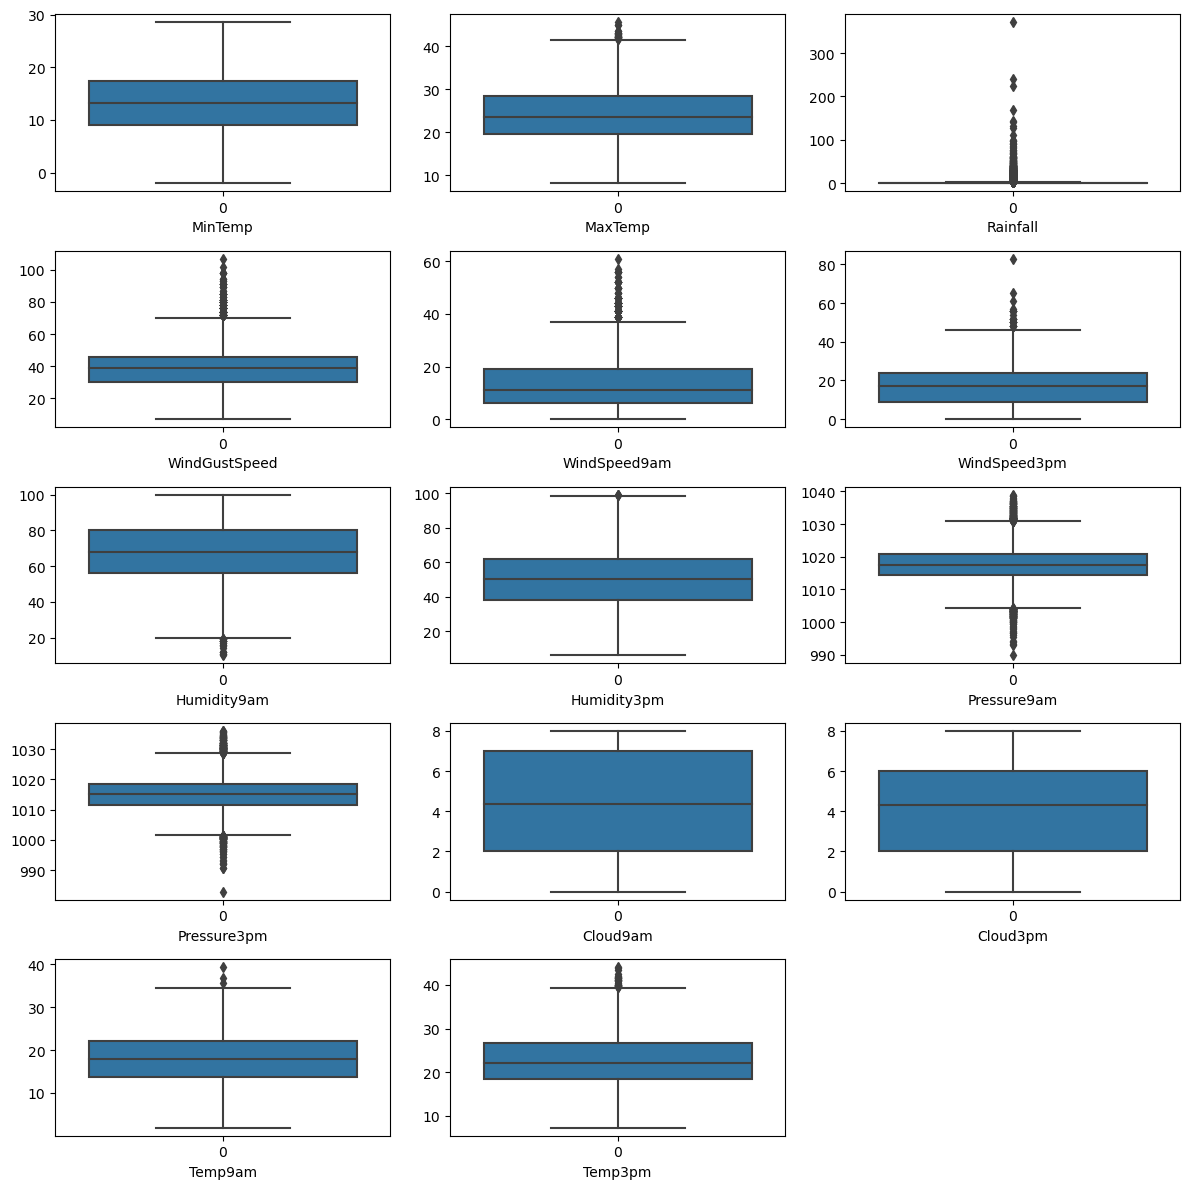

In [42]:
# Checking the outliers using boxplot
plt.figure(figsize=(12,12),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

The columns has  'MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm','Temp9am','Temp3pm' outliers so we need to remove outliers.

**Rainfall column has also a target columns in regression model and numeric variable with lot of zero and high number. So outliers exist in them. There is no point for removing outliers.**

In [43]:
numerical.remove('Rainfall')

## Outliers Detection and removel

### Checking outliers using zscore method

In [44]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore
df_feature = df[numerical]

z = np.abs(zscore(df_feature))            # Apply the formula and get the scaled data

df1 = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Old Data Frame -  6558
New Data Frame -  6353

Data Loss Percentage After removing outliers with zscore method -
  3.125953034461726


### Checking outliers using IQR method

In [45]:
# 1st quantile 
Q1 = df_feature.quantile(0.25)

# 3rd quantile
Q3 = df_feature.quantile(0.75)

#
IQR = Q3 - Q1

df2 = df[~((df_feature<(Q1 - 1.5 * IQR)) | (df_feature>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df2.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Old Data Frame -  6558
New Data Frame -  6006

Data Loss Percentage After removing outliers with zscore method -
  8.417200365965233


In [46]:
# reassigning the changed dataframe name to our original dataframe name
df = df1

df.shape

(6353, 20)

We use zscore method because its Loss less data then IQR method.

#### Checking how the data has been distributed of numerical columns

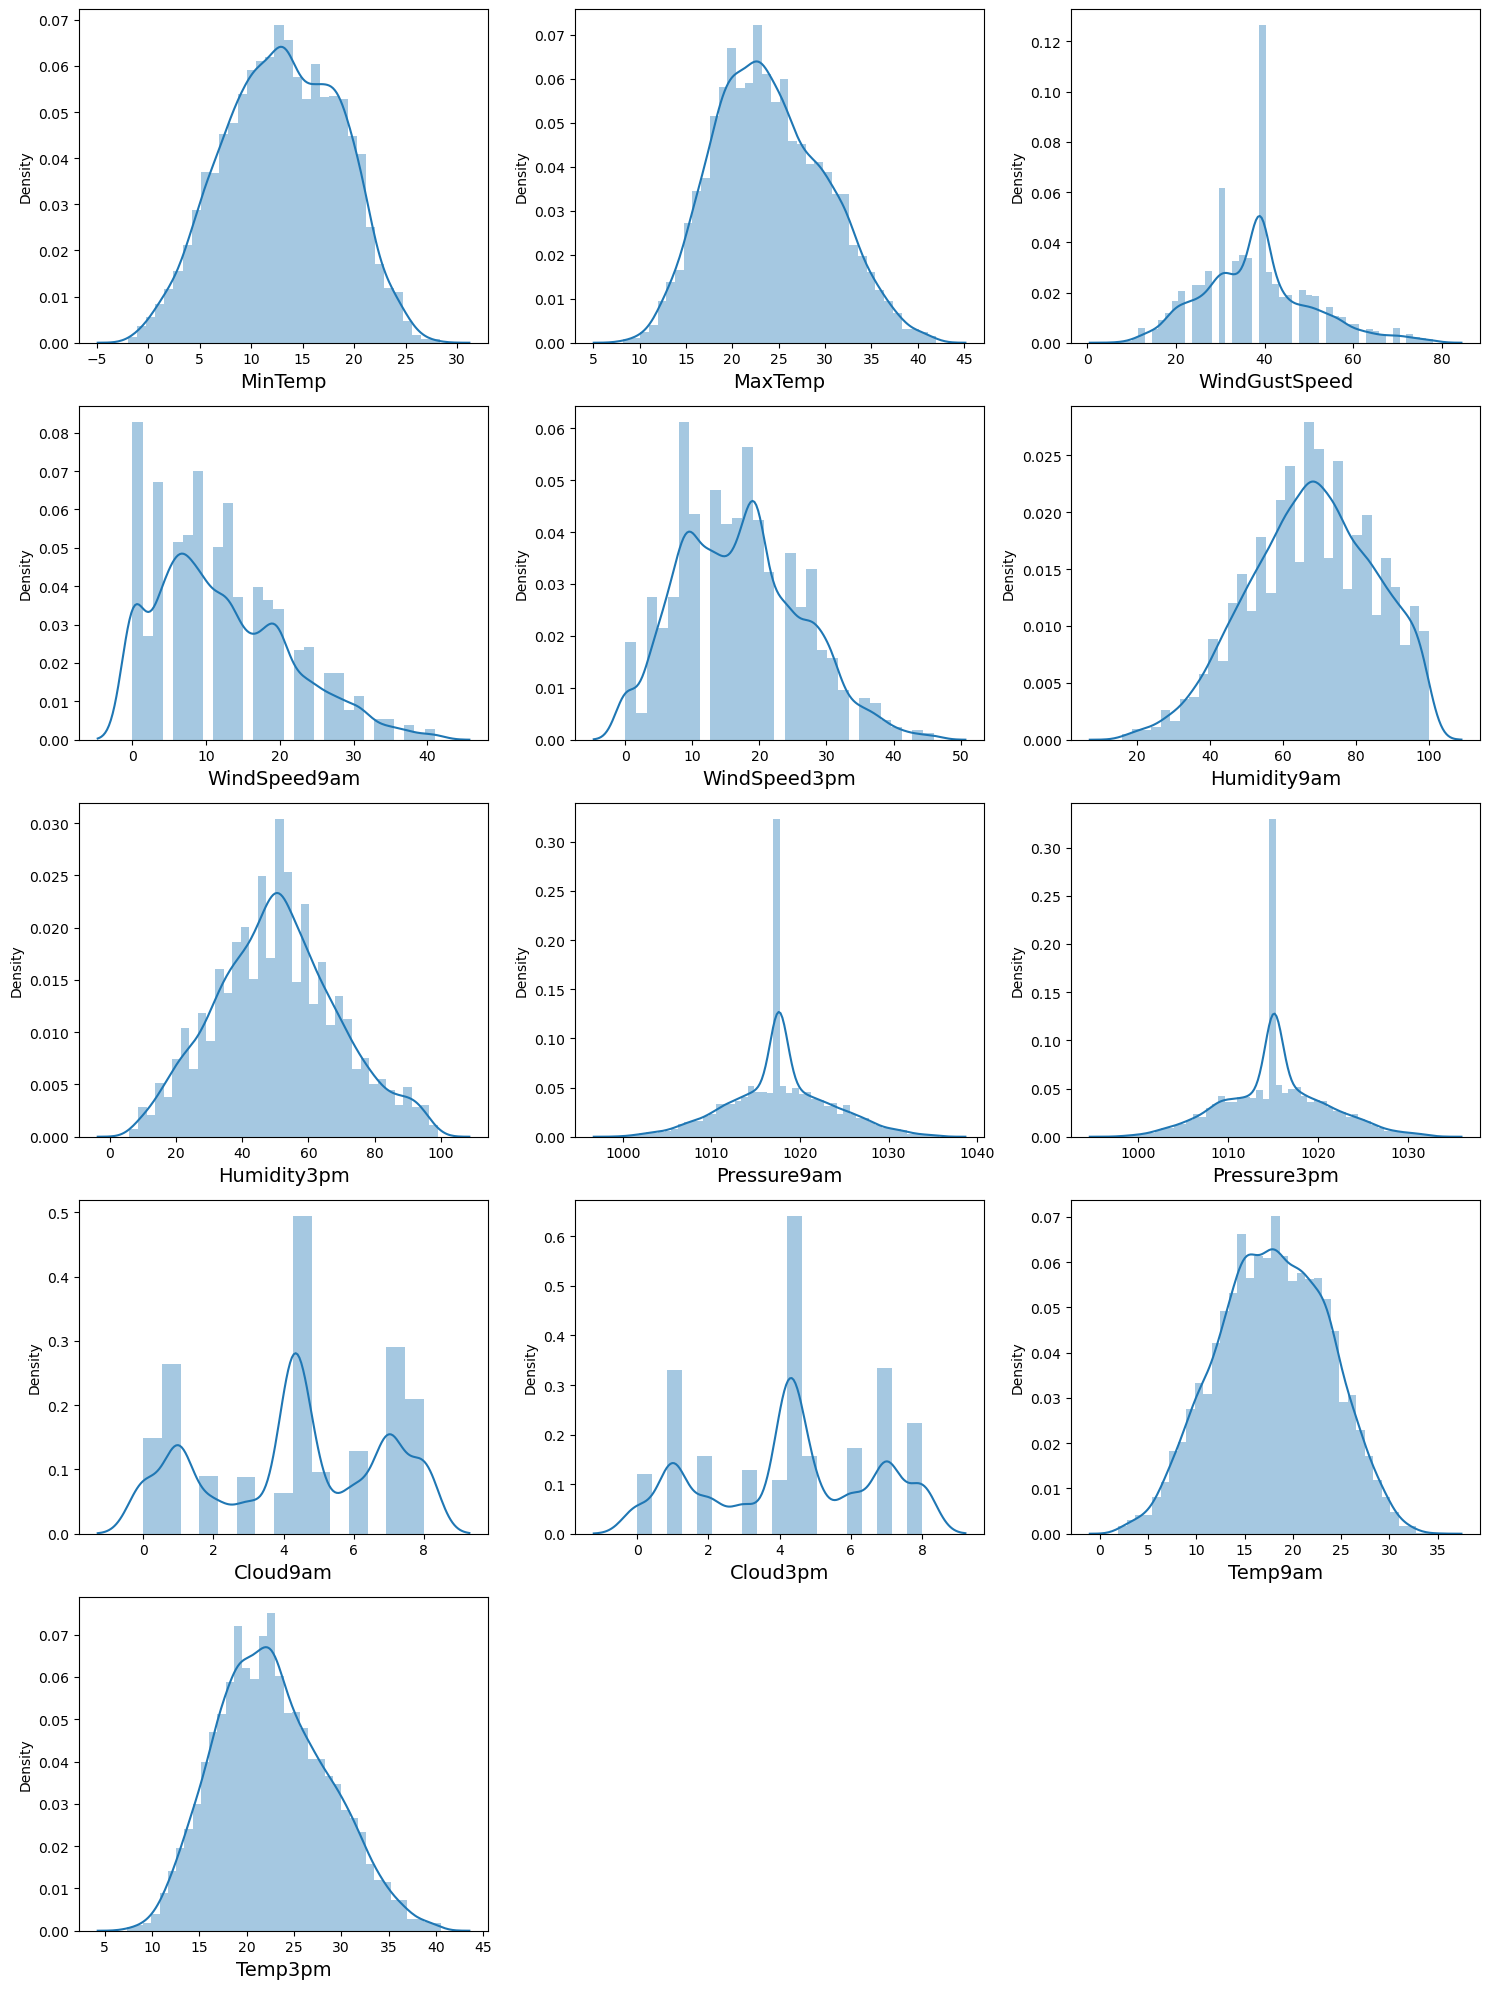

In [47]:
# Checking the distribution of the numerical columns and skewnes
plt.figure(figsize=(15,20),facecolor ='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=14:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=14)
    plotnumber += 1
plt.tight_layout()

The columns has skewness in the data. So we can remove skewness.

## Checking the skewness

In [48]:
df[numerical].skew()

MinTemp         -0.082255
MaxTemp          0.274292
WindGustSpeed    0.490758
WindSpeed9am     0.681318
WindSpeed3pm     0.344807
Humidity9am     -0.232976
Humidity3pm      0.160144
Pressure9am      0.066219
Pressure3pm      0.098357
Cloud9am        -0.201823
Cloud3pm        -0.147961
Temp9am         -0.075922
Temp3pm          0.294211
dtype: float64

It is prefect there are not skewness.

## Encoding categorical columns

In [49]:
# Encoding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i] = LE.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

Location  MinTemp  MaxTemp  Rainfall  WindGustDir  WindGustSpeed  \
Date                                                                           
2008-12-01         1     13.4     22.9       0.6           13           44.0   
2008-12-02         1      7.4     25.1       0.0           14           44.0   
2008-12-03         1     12.9     25.7       0.0           15           46.0   
2008-12-04         1      9.2     28.0       0.0            4           24.0   
2008-12-05         1     17.5     32.3       1.0           13           41.0   

            WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Date                                                                          
2008-12-01          13          14          20.0          24.0         71.0   
2008-12-02           6          15           4.0          22.0         44.0   
2008-12-03          13          15          19.0          26.0         38.0   
2008-12-04           9           0          11.0           9.0         45.0   
2008-12-05           1           7           7.0          20.0         82.0   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Date                                                                    
2008-12-01         22.0       1007.7       1007.1  8.000000  4.320988   
2008-12-02         25.0       1010.6       1007.8  4.336806  4.320988   
2008-12-03         30.0       1007.6       1008.7  4.336806  2.000000   
2008-12-04         16.0       1017.6       1012.8  4.336806  4.320988   
2008-12-05         33.0       1010.8       1006.0  7.000000  8.000000   

            Temp9am  Temp3pm  RainToday  RainTomorrow  
Date                                                   
2008-12-01     16.9     21.8          0             0  
2008-12-02     17.2     24.3          0             0  
2008-12-03     21.0     23.2          0             0  
2008-12-04     18.1     26.5          0             0  
2008-12-05     17.8     29.7          0             0

In [50]:
# Checking the datatype of all the columns after impliment enconding technique
df.dtypes

Location           int32
MinTemp          float64
MaxTemp          float64
Rainfall         float64
WindGustDir        int32
WindGustSpeed    float64
WindDir9am         int32
WindDir3pm         int32
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
dtype: object

# Correlation

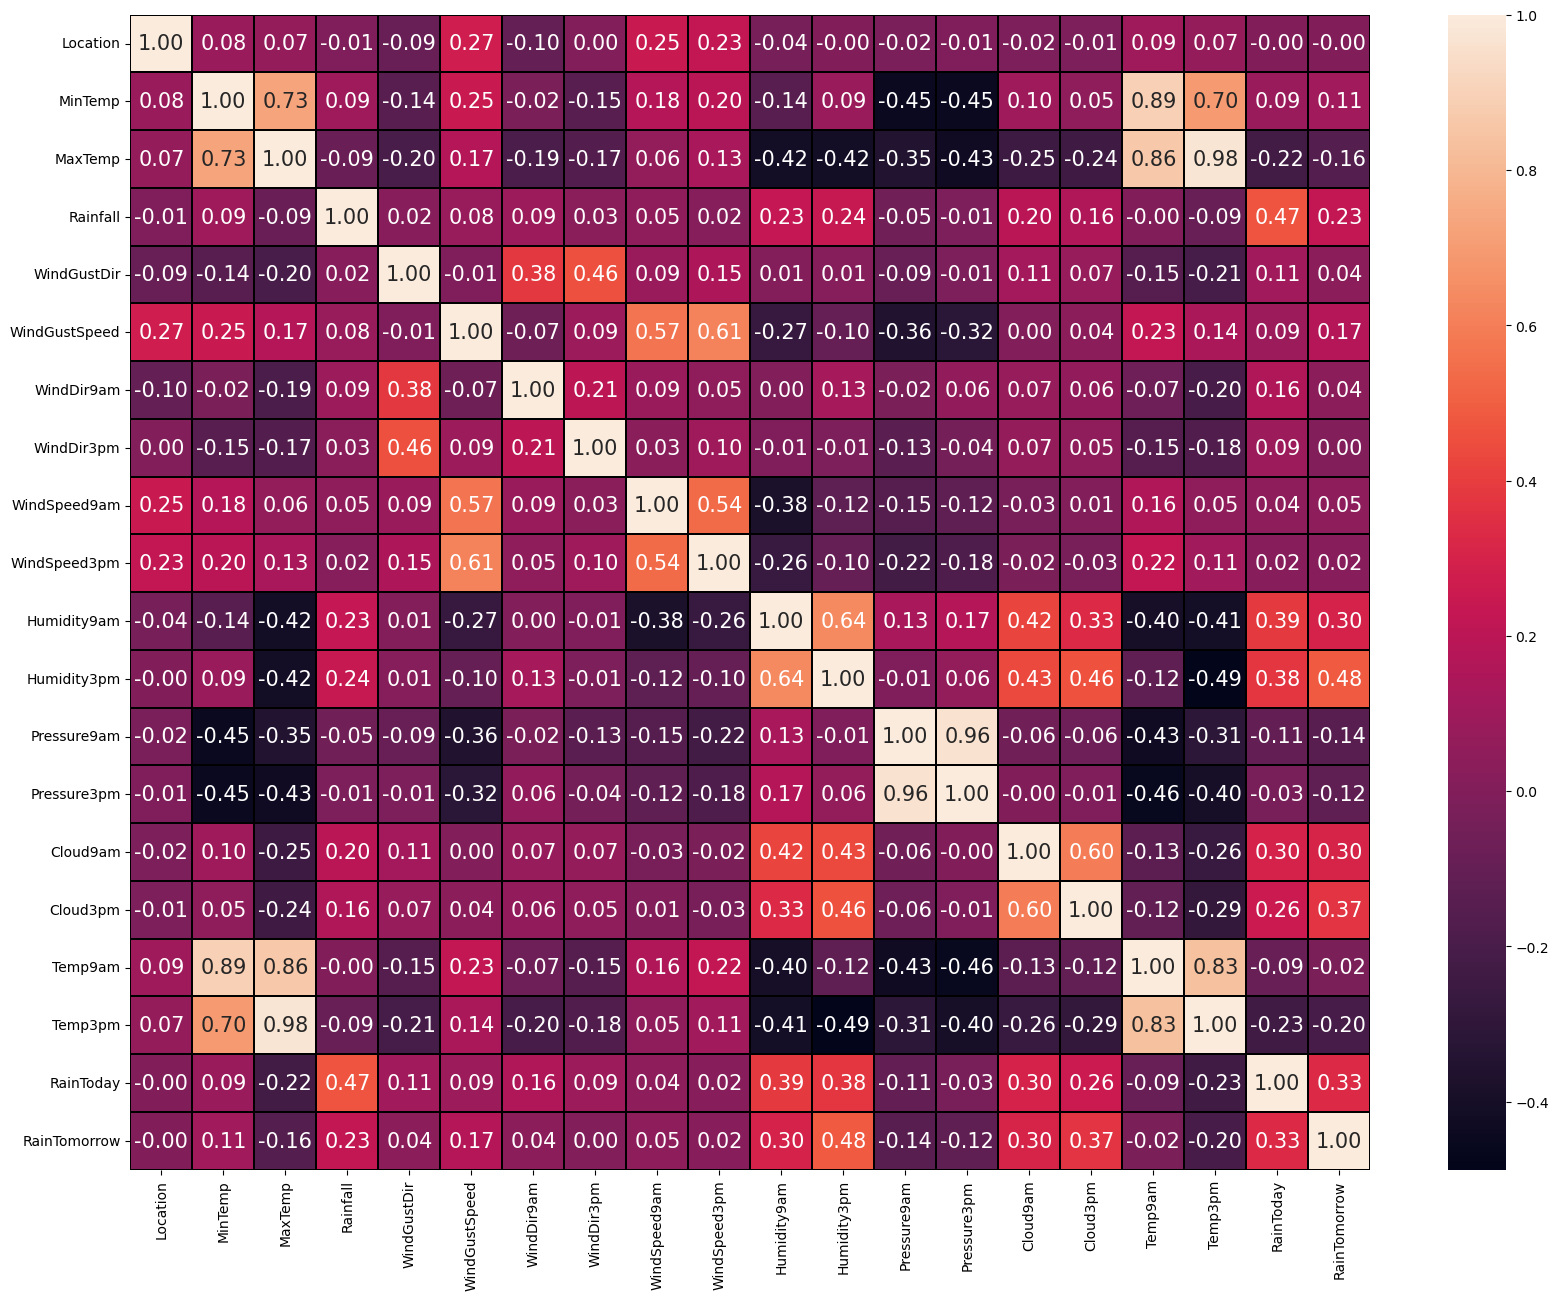

In [51]:
# Checking the correlation between features vs features and feature vs target
df_corr = df.corr()

# Visualizing the correlation using heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, annot=True, annot_kws={'size':15},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

This heamap contains both positive and negative correlation. There is no much postive and negative correlation. We see some features has strong linear relationship betweent them.
* MaxTemp is strong correlaed with MinTemp,Temp3pm,Temp9am 
* MinTemp is strong correlated with MaxTemp,Temp3pm,Temp9am 

First we check VIF after we remove it.

# We Create first Classification model where target columns is RainTomorrow.

### Correlation between feature vs classification target

In [52]:
df_corr['RainTomorrow'].drop('RainTomorrow').sort_values(ascending=False)

Humidity3pm      0.483260
Cloud3pm         0.366650
RainToday        0.327444
Cloud9am         0.303591
Humidity9am      0.299552
Rainfall         0.226975
WindGustSpeed    0.170174
MinTemp          0.105584
WindSpeed9am     0.046838
WindDir9am       0.038208
WindGustDir      0.036005
WindSpeed3pm     0.021642
WindDir3pm       0.000619
Location        -0.004752
Temp9am         -0.021567
Pressure3pm     -0.116577
Pressure9am     -0.143233
MaxTemp         -0.159369
Temp3pm         -0.204291
Name: RainTomorrow, dtype: float64

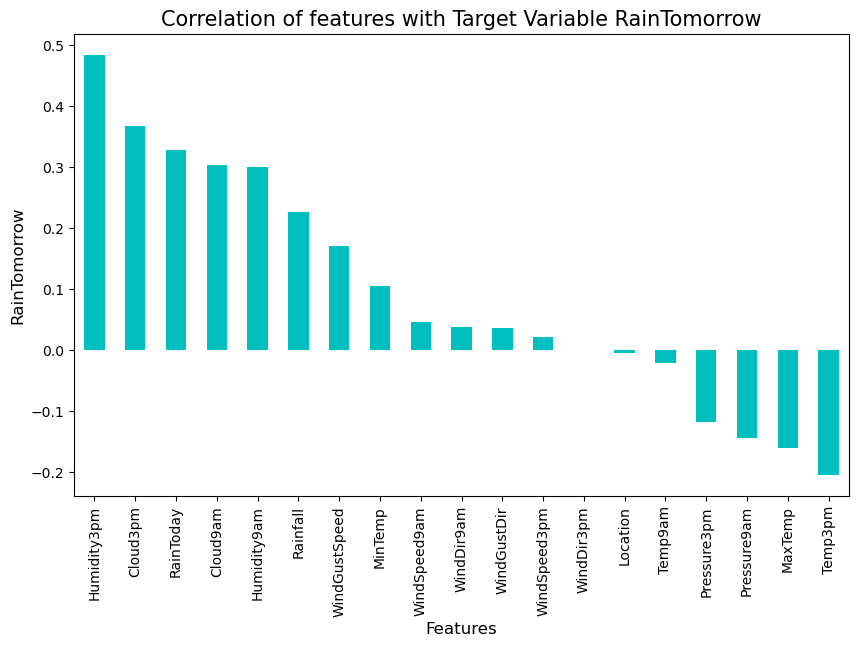

In [53]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['RainTomorrow'].drop(['RainTomorrow']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('RainTomorrow',fontsize=12)
plt.title('Correlation of features with Target Variable RainTomorrow',fontsize = 15)
plt.show()

* WindDir3pm and Locatin features are poorly or moderately correlated with RainTomorrow target variable. 
* Maximum correlation of 0.468258 exist between Humidity3pm with RainTomorrow taget variable.

In [54]:
# Remove uncessary column location
df = df.drop(columns=['Location'],axis=1)

## Sparating features and target

In [55]:
x = df.drop(columns=['RainTomorrow'],axis=1)
y = df['RainTomorrow']

print('Shape of X',x.shape)
print('Shape of y ',y.shape)

Shape of X (6353, 18)
Shape of y  (6353,)


RainTomorrow
0    4891
1    1462
Name: count, dtype: int64


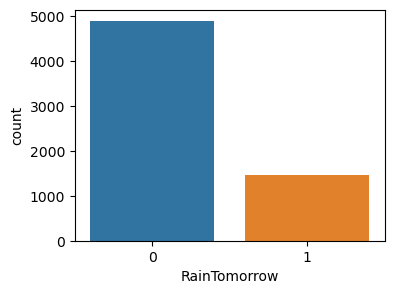

In [56]:
# Checking the count of target columns
print(y.value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x=y)
plt.show()

Here we can see that the data is not balanced, since it is classification problem we will balance the data using oversampling method.

## OverSampling

In [57]:
# Oversampling the data
from imblearn.over_sampling import SMOTE

SM = SMOTE()

x1,y1 = SM.fit_resample(x,y)

RainTomorrow
0    4891
1    4891
Name: count, dtype: int64


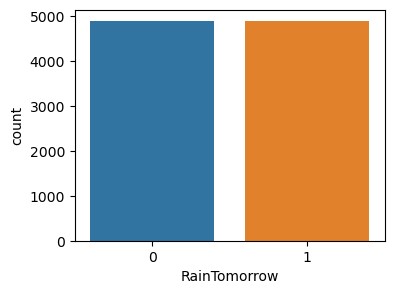

In [58]:
# Checking the count of target columns
print(y1.value_counts())
plt.figure(figsize=(4,3))
sns.countplot(x=y1)
plt.show()

Now the data is balanced.

## Feature Scaling using Standard Scalarization

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

x1.shape

(9782, 18)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

## Checking Variance Inflation Factor (VIF)

In [60]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x1.columns
vif['VIF values'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]

vif

Feature  VIF values
0         MinTemp    9.610932
1         MaxTemp   22.814194
2        Rainfall    1.356802
3     WindGustDir    1.476883
4   WindGustSpeed    2.151303
5      WindDir9am    1.345817
6      WindDir3pm    1.382196
7    WindSpeed9am    2.036418
8    WindSpeed3pm    1.957356
9     Humidity9am    4.291199
10    Humidity3pm    6.409421
11    Pressure9am   20.105884
12    Pressure3pm   19.324211
13       Cloud9am    2.034396
14       Cloud3pm    1.904427
15        Temp9am   19.185199
16        Temp3pm   30.536569
17      RainToday    1.687064

There is multicollinearity issue, So we remove some columns.

In [61]:
# Drop columns for reduce multicollinerity
x1 = x1.drop(columns=['Temp3pm','Temp9am'],axis=1)

In [62]:
# Find variance inflation factor again
vif = pd.DataFrame()
vif['Feature'] = x1.columns
vif['VIF values'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]

vif

Feature  VIF values
0         MinTemp    4.890636
1         MaxTemp    5.791610
2        Rainfall    1.353107
3     WindGustDir    1.473734
4   WindGustSpeed    2.111059
5      WindDir9am    1.341035
6      WindDir3pm    1.381016
7    WindSpeed9am    2.007624
8    WindSpeed3pm    1.907814
9     Humidity9am    2.548917
10    Humidity3pm    3.106295
11    Pressure9am   19.491973
12    Pressure3pm   18.824150
13       Cloud9am    2.006442
14       Cloud3pm    1.887501
15      RainToday    1.684079

There is no multicollinearity issue, We can now move ahead for model building.

## Modelling

In [63]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [64]:
maxAccu = 0
maxRs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu*100,"at random_state", maxRs)  

Best accuracy is  80.17170891251023 at random_state 65


### Creating train test split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=maxRs)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (7336, 16)
The shape of y_train  (7336,)
The shape of x_test   (2446, 16)
The shape of y_test   (2446,)


### Applying all Classification Model

In [66]:
LR  = LogisticRegression()
DT  = DecisionTreeClassifier()
ET  = ExtraTreeClassifier()
RFC = RandomForestClassifier()
BC  = BaggingClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC(probability=True)
XGB = xgb.XGBClassifier()

models = {'LogisticRegression':LR,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFC,
         'Bagging':BC,'AdaBoost':ABC,'GradientBoosting':GBC,'SVC':SVM,'XGBoost':XGB}

In [67]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print('\n\033[1m'+'Classification ML Algorithm model is',name,'\033[0m\n')

    print('\033[1m'+'Accuracy Score :'+'\033[0m', acc_score)
    
    print('\n\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    
    print('\n\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    
    print('****************************************************************************************')


Classification ML Algorithm model is LogisticRegression 

Accuracy Score : 0.8017170891251022

Confusion matrix : 
 [[1000  223]
 [ 262  961]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1223
           1       0.81      0.79      0.80      1223

    accuracy                           0.80      2446
   macro avg       0.80      0.80      0.80      2446
weighted avg       0.80      0.80      0.80      2446

****************************************************************************************

Classification ML Algorithm model is DecisionTree 

Accuracy Score : 0.8348323793949305

Confusion matrix : 
 [[1001  222]
 [ 182 1041]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.82      0.83      1223
           1       0.82      0.85      0.84      1223

    accuracy                           0.83      2446
   macro avg       0.84      0

# Cross Validation

In [68]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    
    score = cross_val_score(model, x1, y1, cv =5)

    print('\n\033[1m'+'Cross Validation Score', name, ':'+'\033[0m\n')
    print("Score          :" ,score)
    print("Mean Score     :",score.mean())
    print('Accuracy Score :',acc_score)
        
    final = acc_score - score.mean()
    print('\nDifferent between Accuracy vs Cross Val Score: ',final)
    
    print('\n***********************************************************************************')


Cross Validation Score LogisticRegression :

Score          : [0.76852325 0.6816556  0.71676892 0.79243354 0.81646217]
Mean Score     : 0.7551686933696145
Accuracy Score : 0.8017170891251022

Different between Accuracy vs Cross Val Score:  0.04654839575548775

***********************************************************************************

Cross Validation Score DecisionTree :

Score          : [0.71742463 0.60705161 0.78374233 0.83537832 0.84100204]
Mean Score     : 0.7569197877056093
Accuracy Score : 0.8405560098119379

Different between Accuracy vs Cross Val Score:  0.0836362221063286

***********************************************************************************

Cross Validation Score ExtraTree :

Score          : [0.72764435 0.64946346 0.75664622 0.80163599 0.82106339]
Mean Score     : 0.751290684272179
Accuracy Score : 0.7951757972199509

Different between Accuracy vs Cross Val Score:  0.043885112947771865

**************************************************************

**We can see that LogisticRegression gives less error between accuracy score and CrossValidation.**

* Score          : [0.77158917 0.69800715 0.7091002  0.79447853 0.8200409 ]
* Mean Score     : 0.7586431905602352
* Accuracy Score : 0.803761242845462

* Different between Accuracy vs Cross Val Score:  0.045118052285226806

## Hyper Parameter Tuning : GridSearchCV

### Tune the parameter with LogisticRegression model

In [69]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'fit_intercept': [True, False], #default: True
            'penalty': ['l1','l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # default: lbfgs
            'random_state': [69]}]

GCV = GridSearchCV(estimator = LR, param_grid=param_grid)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  LogisticRegression(random_state=69)


Best score :  0.7741276289077228


## Final Model

In [70]:
model = GCV.best_estimator_
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('\033[1m'+' Final Model :' +'\033[0m')
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('\nConfusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

 Final Model :
Accuracy Score 0.8017170891251022

Confusion matrix :
 [[1000  223]
 [ 262  961]]

Classification report :
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      1223
           1       0.81      0.79      0.80      1223

    accuracy                           0.80      2446
   macro avg       0.80      0.80      0.80      2446
weighted avg       0.80      0.80      0.80      2446



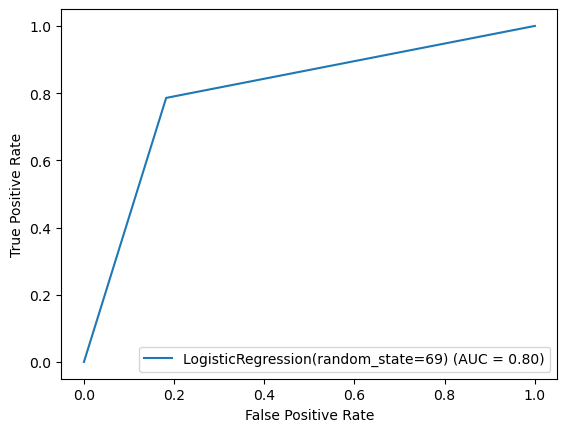

In [71]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name = model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is 100%

### Saving the model

In [72]:
import joblib
joblib.dump(model,'Rainfall_Weather_Forecasting_RainTomorrow.pkl')

['Rainfall_Weather_Forecasting_RainTomorrow.pkl']

### Predicting the saved model

In [73]:
# Let's load the saved model and get the predictions
model = joblib.load("Rainfall_Weather_Forecasting_RainTomorrow.pkl")

# Prediction 
prediction = model.predict(x_test)
prediction

array([0, 0, 1, ..., 0, 0, 1])

# We Create first Regression model where target column is Rainfall.

### Correlation between feature vs regression target

In [74]:
df_corr['Rainfall'].drop('Rainfall').sort_values(ascending=False)

RainToday        0.468258
Humidity3pm      0.243599
Humidity9am      0.227594
RainTomorrow     0.226975
Cloud9am         0.195724
Cloud3pm         0.157921
MinTemp          0.094669
WindDir9am       0.089410
WindGustSpeed    0.076323
WindSpeed9am     0.048480
WindDir3pm       0.027215
WindGustDir      0.022488
WindSpeed3pm     0.016581
Temp9am         -0.002483
Location        -0.011019
Pressure3pm     -0.013275
Pressure9am     -0.054057
MaxTemp         -0.086483
Temp3pm         -0.091617
Name: Rainfall, dtype: float64

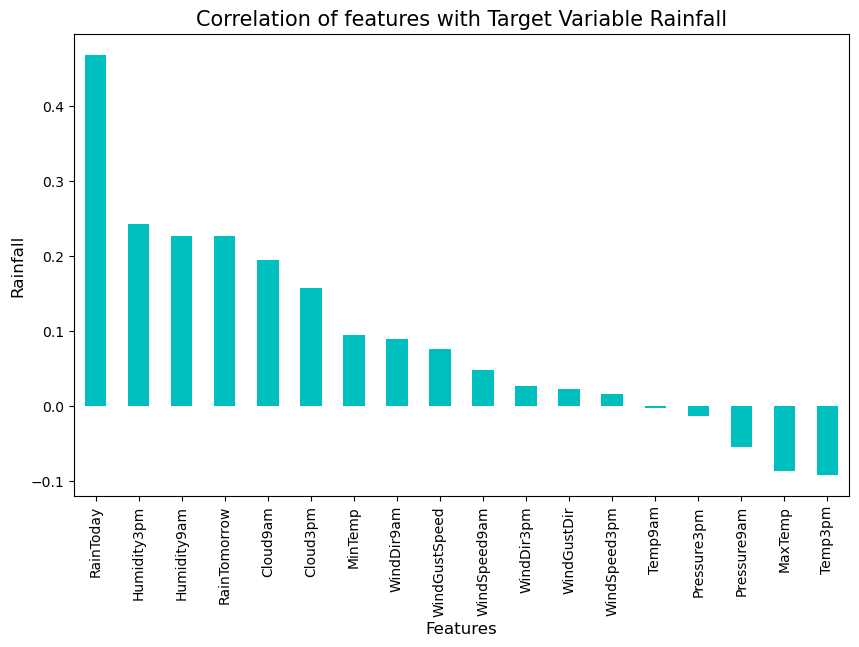

In [75]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (10,6))
df.corr()['Rainfall'].drop(['Rainfall']).sort_values(ascending=False).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=12)
plt.ylabel('Rainfall',fontsize=12)
plt.title('Correlation of features with Target Variable Rainfall',fontsize = 15)
plt.show()

* Temp9am and Locatin features are poorly or moderately correlated with Rainfall target variable.
* Maximum correlation of 0.468258 exist between Raintoday with Rainfall taget variable.

## Sparate feature and target

In [156]:
x = df.drop(columns=['Rainfall'],axis=1)
y = df['Rainfall']

print('Shape of X ',x.shape)
print('Shape of y ',y.shape)

Shape of X  (6353, 18)
Shape of y  (6353,)


In [157]:
from sklearn.feature_selection import SelectKBest, f_classif
best_features = SelectKBest(score_func = f_classif, k=18)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(x.columns)

# concatenate dataframes
features_scores = pd.concat([df_columns,df_scores],axis=1)

features_scores.columns = ['Feature_Name','Score']    # Name of output columns

print(features_scores.nlargest(18,'Score'))           # Print 17 best features

     Feature_Name     Score
16      RainToday       inf
8     Humidity9am  7.574076
9     Humidity3pm  7.150251
17   RainTomorrow  5.782694
12       Cloud9am  4.287160
13       Cloud3pm  3.525762
15        Temp3pm  3.015754
1         MaxTemp  2.838260
4      WindDir9am  1.741339
10    Pressure9am  1.603046
2     WindGustDir  1.598080
3   WindGustSpeed  1.515200
7    WindSpeed3pm  1.511283
14        Temp9am  1.345646
6    WindSpeed9am  1.299402
11    Pressure3pm  1.224985
5      WindDir3pm  1.148176
0         MinTemp  1.126727


### Feature Scaling using Standard Scalarization

In [158]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.shape

(6353, 18)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

### Checking Variance Inflation Factor (VIF)

In [159]:
# Find variance inflation factor of each column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

Feature  VIF values
0         MinTemp    8.891233
1         MaxTemp   26.535375
2     WindGustDir    1.524374
3   WindGustSpeed    2.266361
4      WindDir9am    1.316755
5      WindDir3pm    1.406577
6    WindSpeed9am    1.961988
7    WindSpeed3pm    1.915809
8     Humidity9am    4.034511
9     Humidity3pm    5.755325
10    Pressure9am   20.141417
11    Pressure3pm   19.499060
12       Cloud9am    1.896398
13       Cloud3pm    1.768424
14        Temp9am   17.376116
15        Temp3pm   32.501645
16      RainToday    1.436023
17   RainTomorrow    1.503450

we see the multicollinearty issue, we can remove some columns.

In [160]:
# Drop columns for reduce multicollinearty
x = x.drop(columns=['Temp3pm','Temp9am','Pressure9am'],axis=1)

There is no multicollinearity issue, We can now move ahead for model building.

In [161]:
# Find variance inflation factor again
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

Feature  VIF values
0         MinTemp    4.653382
1         MaxTemp    5.470864
2     WindGustDir    1.506379
3   WindGustSpeed    2.204374
4      WindDir9am    1.295283
5      WindDir3pm    1.328558
6    WindSpeed9am    1.926799
7    WindSpeed3pm    1.844061
8     Humidity9am    2.462021
9     Humidity3pm    3.248196
10    Pressure3pm    1.432380
11       Cloud9am    1.866299
12       Cloud3pm    1.746394
13      RainToday    1.415395
14   RainTomorrow    1.493525

## Modelling

In [162]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [163]:
# Find the best ranom state 
maxAcc = 0
maxRS  = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print('The  Best accuracy score is',maxAcc,' on best random state is',maxRS)

The  Best accuracy score is 0.38787543010227543  on best random state is 172


### Creating train test split

In [164]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRS)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (4764, 15)
The shape of y_train  (4764,)
The shape of x_test   (1589, 15)
The shape of y_test   (1589,)


### Applying all Regression Model

In [165]:
LR  = LinearRegression()
L1 = Lasso()
L2 = Ridge(alpha=0.01)
KNN = KNeighborsRegressor()
DT  = DecisionTreeRegressor()
ET  = ExtraTreeRegressor()
RFR = RandomForestRegressor()
BC  = BaggingRegressor()
ABR = AdaBoostRegressor()
GBR = GradientBoostingRegressor()
SVM = SVR()
XGB = XGBRegressor()

models = {'LinearRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFR,
         'Bagging':BC,'AdaBoost':ABR,'GradientBoosting':GBR,'SVR':SVM,'XGBoost':XGB,'Lasso':L1,'Ridge':L2}

### Applying all the models 

In [166]:
for name,model in models.items():
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print('\033[1m'+'Error of',name,'\033[0m')
    print('Mean absolute error      :',mean_absolute_error(y_test,y_pred))
    print('Mean squared error       :',mean_squared_error(y_test,y_pred))
    print('Root mean squared error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score '+'\033[0m')
    print(r2_score(y_test,y_pred))
    print('*************************************************************************\n')

Error of LinearRegression 
Mean absolute error      : 2.7151272350189153
Mean squared error       : 27.25846909881787
Root mean squared error  : 5.220964383982893


R2 Score 
0.38787543010227543
*************************************************************************

Error of KNeighbors 
Mean absolute error      : 2.2186532410320954
Mean squared error       : 44.30959899307741
Root mean squared error  : 6.656545575077017


R2 Score 
0.004970010324078955
*************************************************************************

Error of DecisionTree 
Mean absolute error      : 3.0601006922592826
Mean squared error       : 125.26577092511013
Root mean squared error  : 11.192219213592546


R2 Score 
-1.8130066979354051
*************************************************************************

Error of ExtraTree 
Mean absolute error      : 3.0971050975456262
Mean squared error       : 191.590981749528
Root mean squared error  : 13.841639416973988


R2 Score 
-3.302426041409591
**********

## Cross Validation

In [167]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_score = r2_score(y_test,y_pred)
    score = cross_val_score(model,x,y,cv = 5)
    print('\033[1m',name,'\033[0m\n')
    print('R2 Score                       :',accuracy_score)
    print('Cross Validation Score         :',score)
    print('Mean of Cross Validation Score :',score.mean())
    
    final = accuracy_score - score.mean()
    print('\nDifferent between R2 Score vs Cross Validaton Score :',final)
    print('********************************************************************************\n')

 LinearRegression 

R2 Score                       : 0.38787543010227543
Cross Validation Score         : [0.16066782 0.21252072 0.31387456 0.27917855 0.34220592]
Mean of Cross Validation Score : 0.261689514818075

Different between R2 Score vs Cross Validaton Score : 0.12618591528420042
********************************************************************************

 KNeighbors 

R2 Score                       : 0.004970010324078955
Cross Validation Score         : [0.19889229 0.08008957 0.01329889 0.27815115 0.18679066]
Mean of Cross Validation Score : 0.15144451290285701

Different between R2 Score vs Cross Validaton Score : -0.14647450257877806
********************************************************************************

 DecisionTree 

R2 Score                       : -1.4126935469775486
Cross Validation Score         : [-0.03701997 -0.33129351 -0.67991331 -0.05757776 -0.88376334]
Mean of Cross Validation Score : -0.39791357724469245

Different between R2 Score vs Cross Valid

#### We can see that LassoRegression gives less error between accuracy score and CrossValidation.

* R2 Score                       : 0.341694201865662
* Cross Validation Score         : [0.13056627 0.1935155  0.31253689 0.27766038 0.32173368]
* Mean of Cross Validation Score : 0.24720254488311158

* Different between R2 Score vs Cross Validaton Score : 0.09449165698255044

### Hyper paramter tuning : GridSearchCV

#### Tune the parameter with LassoRegression model

In [168]:
L1.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [170]:
from sklearn.model_selection import GridSearchCV

param_grid =  {'alpha':np.array([1,0.5,0.1,0.01,0.001,0.0001]),
               'fit_intercept': [True,False],
               'max_iter':[250,500,1000,1500],
               'random_state':np.arange(100),
               'selection':["cyclic","random"]}

GCV = GridSearchCV(estimator = L1, param_grid=param_grid, n_jobs = -1)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  Lasso(alpha=0.1, max_iter=250, random_state=35, selection='random')


Best score :  0.23126940539642993


## Final Model

In [171]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred = Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 2.542471916795685
Mean squared error : 26.807646524337468
Root Mean Squared Error: 5.17761011706535


 R2 Score of Final Model :
0.39799924055925995




 Actual Values Vs Predicted Value plot :


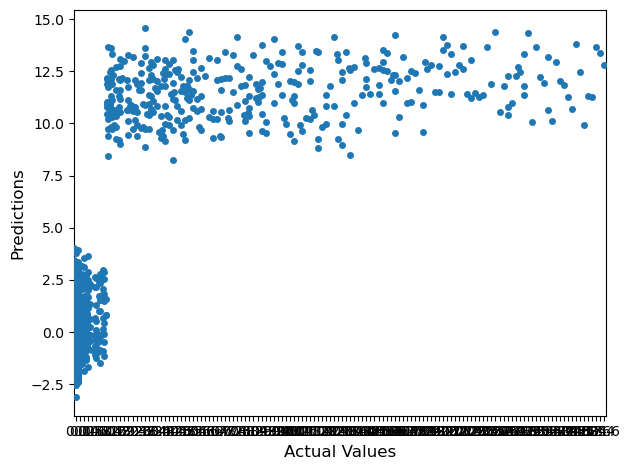

In [172]:
y_pred=Final_mod.predict(x_test)
sns.scatterplot(x = y_test.round(2),y = y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

### We try many technique but the accuracy cannot not increase.

### Saving Model

In [173]:
import pickle
filename = 'Rainfall_Weather_Forecasting_Rainfall.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))  # Saved model

### Predicting the saved model

In [174]:
import pickle
loaded_model = pickle.load(open('Rainfall_Weather_Forecasting_Rainfall.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

39.79992405592599


In [175]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

0        1         2         3        4         5        6     \
Predicted  0.716874 -0.39057 -0.168249  0.081279  1.17709 -1.343901  0.15839   
Original   0.000000  0.00000  0.000000  0.600000  0.00000  0.000000  0.00000   

               7         8         9     ...       1579       1580      1581  \
Predicted  1.026696  0.933928  0.117838  ...  10.539178  11.991699  1.479795   
Original   0.800000  0.000000  0.000000  ...   3.200000  10.200000  0.200000   

              1582      1583      1584      1585      1586     1587      1588  
Predicted  0.57099  0.047207 -1.034763 -2.208107  0.686857  2.05232 -1.824167  
Original   0.00000  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  

[2 rows x 1589 columns]